<a href="https://colab.research.google.com/github/anaC-Fernandes/ProjetoDados/blob/main/Notebooks/Dataset_Economia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

*   **pandas:** Manipula√ß√£o e an√°lise de dados.
*   **numpy:** C√°lculo num√©rico com arrays e matrizes.
*   **matplotlib.pyplot:** Cria√ß√£o de gr√°ficos.
*   **seaborn:** Visualiza√ß√£o estat√≠stica baseada no Matplotlib.





In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mlxtend.frequent_patterns import apriori, association_rules
import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



---



# Prepara√ß√£o dos dados
Leitura de um arquivo CSV hospedado no GitHub e armazenamento dos dados em um DataFrame chamado "df" usando a biblioteca "pandas".
O separador de colunas √© definido como ponto e virgula ";" e o par√¢metro "low_memory=False" garante uma leitura mais precisa dos tipos de dados.

In [137]:
df = pd.read_csv('https://raw.githubusercontent.com/anaC-Fernandes/ProjetoDados/refs/heads/main/Datasets/BrStats.csv', sep = ";", low_memory=False)
df

Ano  CDMunicipio Populacao PessoalOcupado PessoalAssalariado  \
0      2016      3509452     5.932            854                537   
1      2016      3123601    27.505          5.680              4.778   
2      2016      3552007     6.193            668                580   
3      2016      3305604    21.279          3.087              2.669   
4      2016      1717008     4.534            212                183   
...     ...          ...       ...            ...                ...   
33415  2021      2705408     7.171            463                436   
33416  2021      1600105     9.265            428                383   
33417  2019      2605459     3.061          2.210              1.773   
33418  2020      1503002     7.070            538                514   
33419  2021      3166709     8.725            852                773   

      VrSalarios      PIB  QtEmpresas  AreaPlantada_h  AreaColhida_h  ...  \
0         13.692  111.190       252.0            38.0           38.0  ...   
1        104.977  554.663       671.0             3.0            3.0  ...   
2         12.519   62.441        83.0             0.0            0.0  ...   
3         80.161  403.121       290.0             0.0            0.0  ...   
4          5.309   48.551        34.0            94.0           34.0  ...   
...          ...      ...         ...             ...            ...  ...   
33415     10.502      NaN        32.0             0.0            0.0  ...   
33416      9.932      NaN        38.0             0.0            0.0  ...   
33417     43.093  192.775       289.0             0.0            0.0  ...   
33418     12.207   63.579        32.0             0.0            0.0  ...   
33419     28.283      NaN        82.0             6.0            6.0  ...   

       Exportacoes_US$      Receitas_R$ Transferencias_correntes_R$  \
0                  NaN   25.511.889,220              18.911.068,400   
1        1.777.256,000   63.002.672,933              45.304.154,440   
2                  NaN   30.492.825,449              21.861.157,950   
3                  NaN  140.538.926,872             100.508.822,360   
4                  NaN   15.541.375,953              13.178.989,760   
...                ...              ...                         ...   
33415              NaN              NaN                         NaN   
33416              NaN              NaN                         NaN   
33417              NaN              NaN                         NaN   
33418              NaN              NaN                         NaN   
33419              NaN              NaN                         NaN   

      Transferencias_capital_R$ NrNascimentos NrObitosInfantis povoamento  UF  \
0                 1.665.392,540          80.0              0.0     32,065  SP   
1                   538.882,600         299.0              3.0     55,065  MG   
2                 1.048.458,040          59.0              2.0     14,930  SP   
3                   871.234,340         272.0              2.0     22,698  RJ   
4                     8.037,870          43.0              1.0      2,908  TO   
...                         ...           ...              ...        ...  ..   
33415                       NaN         135.0              3.0     83,287  AL   
33416                       NaN         160.0              2.0      1,010  AP   
33417                       NaN          32.0              1.0    180,059  PE   
33418                       NaN         149.0              4.0      0,601  PA   
33419                       NaN         106.0              1.0     40,847  MG   

                     Municipio    Regiao  
0      Campina do Monte Alegre   Sudeste  
1                  El√≥i Mendes   Sudeste  
2                    Silveiras   Sudeste  
3                 Silva Jardim   Sudeste  
4       Pindorama do Tocantins     Norte  
...                        ...       ...  
33415            Monteir√≥polis  Nordeste  
33416                    Amap√°     Norte  
33



---



Esses comandos s√£o fundamentais para padronizar e limpar os dados, garantindo que todos os valores estejam no formato correto para an√°lise. Eles corrigem inconsist√™ncias, como separar casas de milhar, formatos decimais diferentes e valores ausentes representados como "nan". Essa padroniza√ß√£o evita erros em c√°lculos, compara√ß√µes e visualiza√ß√µes, al√©m de permitir que os dados sejam tratados  de forma uniformeao longo do projeto.

In [138]:
warnings.filterwarnings("ignore")
for coluna in df.columns:
    df[coluna] = df[coluna].astype(str)  # Garante que √© string
    df[coluna] = df[coluna].str.replace('.', '', regex=False)  # Remove separador de milhar
    df[coluna] = df[coluna].str.replace(',', '.', regex=False)  # Converte decimal
    df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para n√∫mero, ignorando erros

for coluna in df.columns:
  df[coluna] = df[coluna].astype(str)  # Garante que √© string
  df[coluna] = df[coluna].str.replace('nan', '0', regex=False)  # Converte decimal

df

Ano CDMunicipio Populacao PessoalOcupado PessoalAssalariado  \
0      2016     3509452      5932            854                537   
1      2016     3123601     27505           5680               4778   
2      2016     3552007      6193            668                580   
3      2016     3305604     21279           3087               2669   
4      2016     1717008      4534            212                183   
...     ...         ...       ...            ...                ...   
33415  2021     2705408      7171            463                436   
33416  2021     1600105      9265            428                383   
33417  2019     2605459      3061           2210               1773   
33418  2020     1503002      7070            538                514   
33419  2021     3166709      8725            852                773   

      VrSalarios     PIB QtEmpresas AreaPlantada_h AreaColhida_h  ...  \
0          13692  111190       2520            380           380  ...   
1         104977  554663       6710             30            30  ...   
2          12519   62441        830             00            00  ...   
3          80161  403121       2900             00            00  ...   
4           5309   48551        340            940           340  ...   
...          ...     ...        ...            ...           ...  ...   
33415      10502       0        320             00            00  ...   
33416       9932       0        380             00            00  ...   
33417      43093  192775       2890             00            00  ...   
33418      12207   63579        320             00            00  ...   
33419      28283       0        820             60            60  ...   

      Exportacoes_US$    Receitas_R$ Transferencias_correntes_R$  \
0                   0   25511889.220                18911068.400   
1         1777256.000   63002672.933                45304154.440   
2                   0   30492825.449                21861157.950   
3                   0  140538926.872               100508822.360   
4                   0   15541375.953                13178989.760   
...               ...            ...                         ...   
33415               0              0                           0   
33416               0              0                           0   
33417               0              0                           0   
33418               0              0                           0   
33419               0              0                           0   

      Transferencias_capital_R$ NrNascimentos NrObitosInfantis povoamento  UF  \
0                   1665392.540           800                0     32.065  SP   
1                    538882.600          2990               30     55.065  MG   
2                   1048458.040           590               20     14.930  SP   
3                    871234.340          2720               20     22.698  RJ   
4                      8037.870           430               10      2.908  TO   
...                         ...           ...              ...        ...  ..   
33415                         0          1350               30     83.287  AL   
33416                         0          1600               20      1.010  AP   
33417                         0           320               10    180.059  PE   
33418                         0          1490               40      0.601  PA   
33419                         0          1060               10     40.847  MG   

                     Municipio    Regiao  
0      Campina do Monte Alegre   Sudeste  
1                  El√≥i Mendes   Sudeste  
2                    Silveiras   Sudeste  
3                 Silva Jardim   Sudeste  
4       Pindorama do Tocantins     Norte  
...                        ...       ...  
33415            Monteir√≥polis  Nordeste  
33416                    Amap√°     Norte  
33417        Fer0do de Noronha  Nordeste  
33418                     Faro     Norte  
33419       



---



Conver√ß√£o explicita dos tipos dos dados das colunas para tipos mais apropriados ao seu conte√∫do. Colunas num√©ricas que representam contagens ou valores inteiros, como popula√ß√£o, n√∫mero de empresas ou PIB, foram convertidas para o tipo "int". Colunas que cont√™m valores monet√°rios ou propor√ß√µes, como receitas ou povoamento, foram convertidas para o tipo "float". J√° a coluna CDMunicipio, por ser um identificadorque pode conter zeros √† esquerda, foi convertido para "str". Isso assegura que os dados estejam no formato correto para an√°lise, visualiza√ß√µes e opera√ß√µes matem√°ticas.

In [139]:
#Momentaniamente n√£o utilizada
df['Ano'] = df['Ano'].astype(int)
df['CDMunicipio'] = df['CDMunicipio'].astype(str)
df['Populacao'] = df['Populacao'].astype(int)
df['PessoalOcupado'] = df['PessoalOcupado'].astype(int)
df['PessoalAssalariado'] = df['PessoalAssalariado'].astype(int)
df['VrSalarios'] = df['VrSalarios'].astype(int)
df['PIB'] = df['PIB'].astype(int)
df['QtEmpresas'] = df['QtEmpresas'].astype(int)
df['AreaPlantada_h'] = df['AreaPlantada_h'].astype(int)
df['AreaColhida_h'] = df['AreaColhida_h'].astype(int)
df['VlProducaoAgricola'] = df['VlProducaoAgricola'].astype(int)
df['VlProducaoPecuaria'] = df['VlProducaoPecuaria'].astype(int)
df['Area'] = df['Area'].astype(float)
df['Importacoes_US$'] = df['Importacoes_US$'].astype(float)
df['Exportacoes_US$'] = df['Exportacoes_US$'].astype(float)
df['Receitas_R$'] = df['Receitas_R$'].astype(float)
df['Transferencias_correntes_R$'] = df['Transferencias_correntes_R$'].astype(float)
df['Transferencias_capital_R$'] = df['Transferencias_capital_R$'].astype(float)
df['NrNascimentos'] = df['NrNascimentos'].astype(int)
df['NrObitosInfantis'] = df['NrObitosInfantis'].astype(int)
df['povoamento'] = df['povoamento'].astype(float)
df.dtypes


Ano                              int64
CDMunicipio                     object
Populacao                        int64
PessoalOcupado                   int64
PessoalAssalariado               int64
VrSalarios                       int64
PIB                              int64
QtEmpresas                       int64
AreaPlantada_h                   int64
AreaColhida_h                    int64
VlProducaoAgricola               int64
VlProducaoPecuaria               int64
Area                           float64
Importacoes_US$                float64
Exportacoes_US$                float64
Receitas_R$                    float64
Transferencias_correntes_R$    float64
Transferencias_capital_R$      float64
NrNascimentos                    int64
NrObitosInfantis                 int64
povoamento                     float64
UF                              object
Municipio                       object
Regiao                          object
dtype: object



---



Implementada com o intuito de remover colunas irrelevantes ou desnecess√°rias do conjunto de dados, sem causar erros. Isso contribui para manter o DataFrame mais limpo, enxuto e focado apenas nas vari√°veis √∫teis para as an√°lises do projeto.

In [140]:
columns_to_drop = ['AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola', 'VlProducaoPecuaria']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]


df = df.drop(columns=existing_columns_to_drop)
df


Ano CDMunicipio  Populacao  PessoalOcupado  PessoalAssalariado  \
0      2016     3509452       5932             854                 537   
1      2016     3123601      27505            5680                4778   
2      2016     3552007       6193             668                 580   
3      2016     3305604      21279            3087                2669   
4      2016     1717008       4534             212                 183   
...     ...         ...        ...             ...                 ...   
33415  2021     2705408       7171             463                 436   
33416  2021     1600105       9265             428                 383   
33417  2019     2605459       3061            2210                1773   
33418  2020     1503002       7070             538                 514   
33419  2021     3166709       8725             852                 773   

       VrSalarios     PIB  QtEmpresas     Area  Importacoes_US$  \
0           13692  111190        2520    185.0             40.0   
1          104977  554663        6710    499.5             60.0   
2           12519   62441         830    414.8             70.0   
3           80161  403121        2900    937.5             97.0   
4            5309   48551         340   1559.1            107.0   
...           ...     ...         ...      ...              ...   
33415       10502       0         320     86.1              0.0   
33416        9932       0         380   9175.9              0.0   
33417       43093  192775        2890     17.0              0.0   
33418       12207   63579         320  11770.6              0.0   
33419       28283       0         820    213.6              0.0   

       Exportacoes_US$   Receitas_R$  Transferencias_correntes_R$  \
0                  0.0  2.551189e+07                 1.891107e+07   
1            1777256.0  6.300267e+07                 4.530415e+07   
2                  0.0  3.049283e+07                 2.186116e+07   
3                  0.0  1.405389e+08                 1.005088e+08   
4                  0.0  1.554138e+07                 1.317899e+07   
...                ...           ...                          ...   
33415              0.0  0.000000e+00                 0.000000e+00   
33416              0.0  0.000000e+00                 0.000000e+00   
33417              0.0  0.000000e+00                 0.000000e+00   
33418              0.0  0.000000e+00                 0.000000e+00   
33419              0.0  0.000000e+00                 0.000000e+00   

       Transferencias_capital_R$  NrNascimentos  NrObitosInfantis  povoamento  \
0                     1665392.54            800                 0      32.065   
1                      538882.60           2990                30      55.065   
2                     1048458.04            590                20      14.930   
3                      871234.34           2720                20      22.698   
4                        8037.87            430                10       2.908   
...                          ...            ...               ...         ...   
33415                       0.00           1350                30      83.287   
33416                       0.00           1600                20       1.010   
33417                       0.00            320                10     180.059   
33418                       0.00           1490                40       0.601   
33419                       0.00           1060                10      40.847   

       UF                Municipio    Regiao  
0      SP  Campina do Monte Alegre   Sudeste  
1      MG              El√≥i Mendes   Sudeste  
2      SP                Silveiras   Sudeste  
3      RJ             Silva Jardim   Sudeste  
4      TO   Pindorama do Tocantins     Norte  
...    ..                      ...       ...  
33415  AL            Monteir√≥polis  Nordeste  
33416  AP                    Amap√°     Norte  
33417  PE        Fer0do de Noronha  Nordeste  
33418  PA                     Faro     




---




# Pergunta 1

**Existe uma correla√ß√£o entre a quantidade de empresas (QtEmpresas) e indicadores sociais (Popula√ß√£o, NrNascimento, NrObitosInfantis)?**





##Definini√ß√£o de fun√ß√µes
As duas fun√ß√µes seguintes s√£o utilizadas para simplificar gr√°ficos que foram plotados com frequencia, desse modo temos a "preparar_dados", que realiza o tratamento necess√°rio para que os dados possam ser plotados sem erros.
Al√©m disso temos tamb√©m a "plot_scatter_with_regression" que realiza um scatter plot com sua respectiva regress√£o linear e resultados do modelo obtido.

In [141]:
def preparar_dados(df, col_x, col_y, filtro_x=None):
    dados = df[[col_x, col_y]].dropna().copy()
    dados[col_x] = pd.to_numeric(dados[col_x], errors='coerce')
    dados[col_y] = pd.to_numeric(dados[col_y], errors='coerce')
    dados = dados[(dados[col_x] != 0) & (dados[col_y] != 0)]
    dados = dados.dropna().astype(int)

    if filtro_x:
        dados = dados[(dados[col_x] >= filtro_x[0]) & (dados[col_x] <= filtro_x[1])]

    return dados[col_x], dados[col_y]

def plot_scatter_with_regression(ax, x, y, title, xlabel, ylabel):
    # Ajuste da regress√£o
    X = np.array(x).reshape(-1, 1)
    Y = np.array(y)
    model = LinearRegression()
    model.fit(X, Y)
    Y_pred = model.predict(X)
    r2 = r2_score(Y, Y_pred)

    a = model.coef_[0]
    b = model.intercept_

    # Plot dos dados e da regress√£o
    ax.scatter(X, Y, color='royalblue', alpha=0.6, label="Dados")
    ax.plot(X, Y_pred, color='red', label="Regress√£o Linear")
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(False)
    ax.legend()

    # Texto com os par√¢metros no gr√°fico (posi√ß√£o relativa no canto inferior direito)
    textstr = f"a = {a:.2f}\nb = {b:.2f}\n$R^2$ = {r2:.2f}"
    ax.text(0.95, 0.05, textstr, transform=ax.transAxes,
            fontsize=10, verticalalignment='bottom',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

Com as fun√ß√µes necess√°rias definidas, para come√ßar a buscar uma resposta, inicialmente ser√° plotado os gr√°ficos sobre cada um dos indicadores sociais (eixo Y) pela quantidade de empresas (eixo X).

## Gr√°ficos com regress√£o linear da quantidade de empresas pelos 3 indicadores sociais

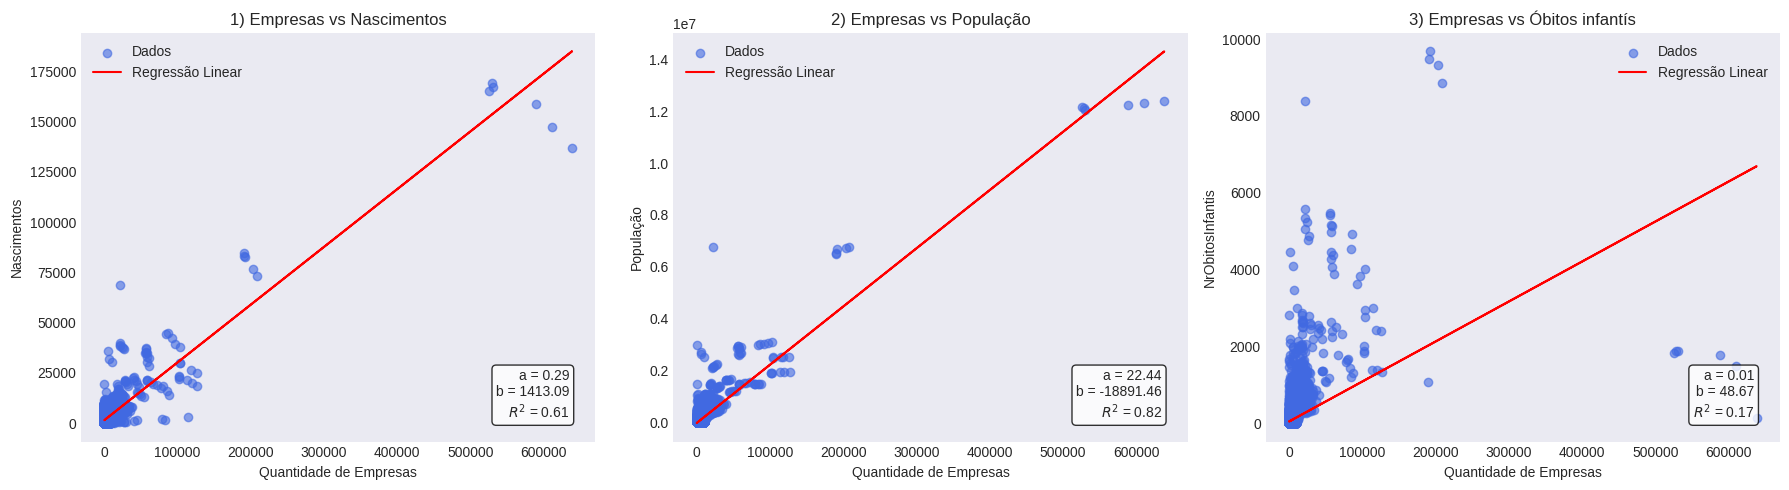

In [142]:
# Preparar os dados para os tr√™s gr√°ficos
x1, y1 = preparar_dados(df, 'QtEmpresas', 'NrNascimentos')
x2, y2 = preparar_dados(df, 'QtEmpresas', 'Populacao')
x3, y3 = preparar_dados(df, 'QtEmpresas', 'NrObitosInfantis')

# Criar os tr√™s gr√°ficos lado a lado
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plot_scatter_with_regression(axs[0], x1, y1, "1) Empresas vs Nascimentos", "Quantidade de Empresas", "Nascimentos")
plot_scatter_with_regression(axs[1], x2, y2, "2) Empresas vs Popula√ß√£o", "Quantidade de Empresas", "Popula√ß√£o")
plot_scatter_with_regression(axs[2], x3, y3, "3) Empresas vs √ìbitos infant√≠s", "Quantidade de Empresas", "NrObitosInfantis")

plt.tight_layout()
plt.show()

Ao analizarmos o gr√°fico produzidos e os resultados de suas respectivas regress√µes lineares podemos realizar algumas observa√ß√µes bem relevantes. Inicialmente pode-se observar  que o gr√°fico 1 e 3 possuem o coeficiente de inclina√ß√£o da reta 'a' bem pequeno, o que se deve ao fato dos valores do eixo X serem bem maiores que os do eixo Y, o que leva a uma representa√ß√£o visual fora de escala.

Agora analizando os coeficientes de determina√ß√£o 'R¬≤', o modelo obtido aparenta ter dado um resultado bom para o plot 2, R¬≤ = 0.82, mediano para o 1, R¬≤ = 0.61 e ruim para o 3, R¬≤ = 0.18. Contudo, se realizarmos uma an√°lise mais a fundo sobre a escala do gr√°fico e sobre como funciona o coeficiente, √© dedut√≠vel que o resultado obtido esta mascarado, uma vez que devido ao enorme peso dos valores mais √† direita, eles convergem a regress√°o para passar pr√≥ximo deles, fazendo com que o erro seja minimizado.

Com as considera√ß√µes feitas anteriormente em mente, podemos observar que existem 3 agrupamentos principais de dados, sendo o primeiro com o n√∫mero de empresas abaixo dos 150.000, o segundo com a quantidade de empresas entre 150.000 e 300000, e por fim o com a quantidade de empresas acima dos 300.000. Com isso para aprofuindar a an√°lise, realizaremos a contagem de quantas amostras pertencem a cada um dos grupos identificados.

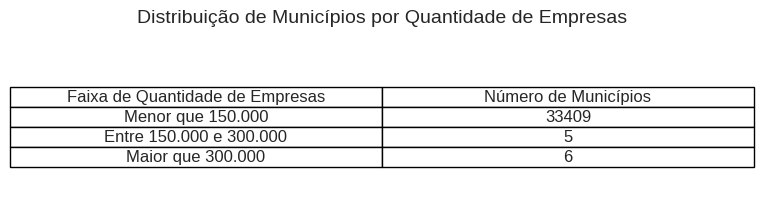

In [143]:
df_filtrado = df[['QtEmpresas']].copy()
df_filtrado['QtEmpresas'] = pd.to_numeric(df_filtrado['QtEmpresas'], errors='coerce')
df_filtrado = df_filtrado.dropna().astype(int)

menor_150k = df_filtrado[df_filtrado['QtEmpresas'] < 150000].shape[0]
entre_150k_300k = df_filtrado[(df_filtrado['QtEmpresas'] >= 150000) & (df_filtrado['QtEmpresas'] <= 300000)].shape[0]
maior_300k = df_filtrado[df_filtrado['QtEmpresas'] > 300000].shape[0]

tabela_empresas = pd.DataFrame({
    'Faixa de Quantidade de Empresas': [
        'Menor que 150.000',
        'Entre 150.000 e 300.000',
        'Maior que 300.000'
    ],
    'N√∫mero de Munic√≠pios': [
        menor_150k,
        entre_150k_300k,
        maior_300k
    ]
})


fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')


tabela = ax.table(
    cellText=tabela_empresas.values,
    colLabels=tabela_empresas.columns,
    cellLoc='center',
    loc='center'
)

tabela.auto_set_font_size(False)
tabela.set_fontsize(12)
tabela.scale(1.2, 1.2)

plt.title('Distribui√ß√£o de Munic√≠pios por Quantidade de Empresas', fontsize=14, pad=20)
plt.show()

Ap√≥s realizarmos a contagem da popula√ß√£o de cada subgrupo, resultando em 33.409 para o primeiro, 5 para o segundo e 6 para o terceiro, fica evidente que na verdade os √∫ltimos dois subgrupos se tratam de outliers, sendo assim necess√°rio os desconsiderar para uma an√°lise mais acertiva. Deste modo foi produzido uma rela√ß√£o em que a quantidade de empresas foi limitada a 150.000.

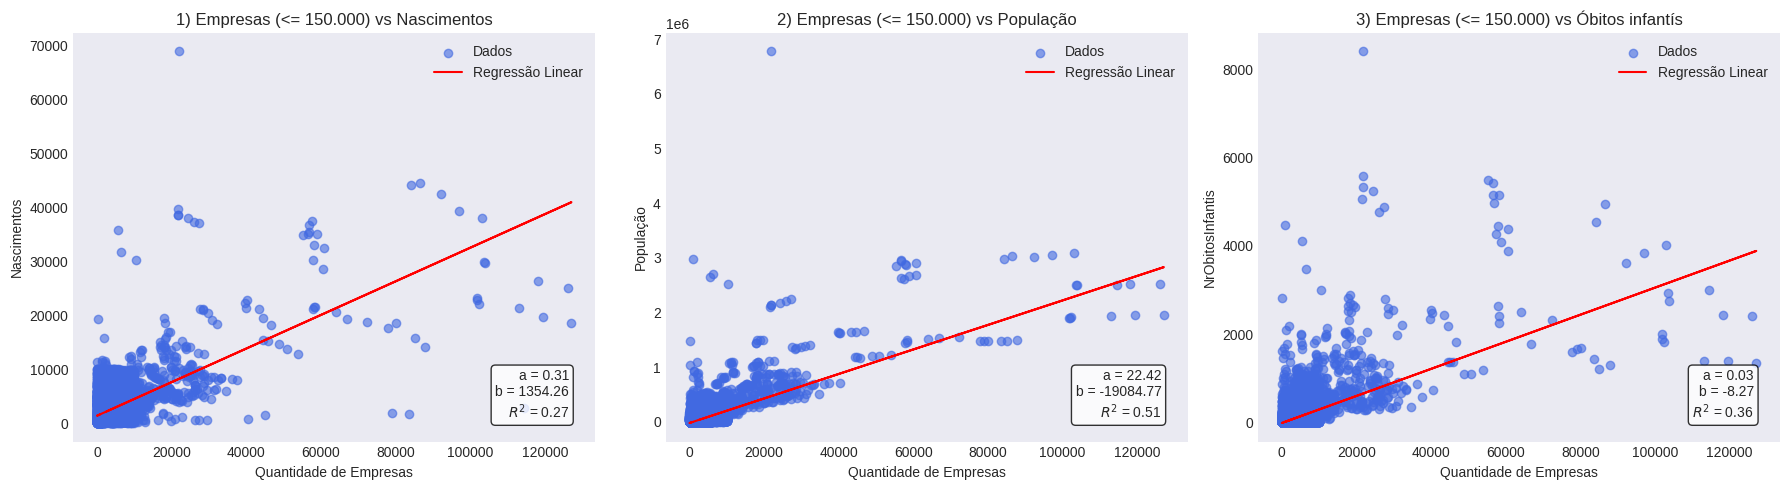

In [144]:
# Preparar os dados para os tr√™s gr√°ficos
x1, y1 = preparar_dados(df, 'QtEmpresas', 'NrNascimentos', filtro_x=(0, 150000))
x2, y2 = preparar_dados(df, 'QtEmpresas', 'Populacao', filtro_x=(0, 150000))
x3, y3 = preparar_dados(df, 'QtEmpresas', 'NrObitosInfantis', filtro_x=(0, 150000))

# Criar os tr√™s gr√°ficos lado a lado
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plot_scatter_with_regression(axs[0], x1, y1, "1) Empresas (<= 150.000) vs Nascimentos", "Quantidade de Empresas", "Nascimentos")
plot_scatter_with_regression(axs[1], x2, y2, "2) Empresas (<= 150.000) vs Popula√ß√£o", "Quantidade de Empresas", "Popula√ß√£o")
plot_scatter_with_regression(axs[2], x3, y3, "3) Empresas (<= 150.000) vs √ìbitos infant√≠s", "Quantidade de Empresas", "NrObitosInfantis")

plt.tight_layout()
plt.show()

Ap√≥s a exclus√£o dos outliers, podemos observar que a disper√ß√£o que antes parecia de certa forma crescente, na verdade em sua maioria √© irregular, o que pode ser comprovado tanto por uma an√°lise visual quanto pela an√°lise dos novos coeficientes de determina√ß√£o, que em geral soferam uma baixa consider√°vel, indicando que os atuais modelos obtidos explicam uma baixa porcentagem dos dados. No entanto, por mais que esteja mediano para ruim podemos observar uma poss√≠vel correla√ßo entre a Popula√ß√£o e a quantidade de empresas, uma vez que este modelo est√° explicando 51% dos dados.

Com a an√°lise feita, cria-se uma poss√≠bilidade de que n√£o necess√°riamente seja poss√≠vel obter uma correla√ß√£o entre os dados desejados.

###Regress√£o multivariada

Na tentativa de relacionar as 3 vari√°veis com a quantidade de empresas, foi realizada uma an√°lise multivariada, em que Y foi a quantidade de empresas e as vari√°veis foram os indicadores sociais previamente definidos.

In [145]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Seleciona as colunas necess√°rias e remove valores ausentes ou n√£o num√©ricos
colunas = ['QtEmpresas', 'NrNascimentos', 'Populacao', 'NrObitosInfantis']
df_limpo = df[colunas].copy()

# Converte para valores num√©ricos e remove NaNs e zeros
for col in colunas:
    df_limpo[col] = pd.to_numeric(df_limpo[col], errors='coerce')
df_limpo = df_limpo.dropna()
df_limpo = df_limpo[(df_limpo != 0).all(axis=1)]  # Remove linhas com valores 0

# Aplica o filtro para manter apenas QtEmpresas < 150000
df_limpo = df_limpo[df_limpo['QtEmpresas'] < 150000]

# Define vari√°veis dependente e independentes
X = df_limpo[['NrNascimentos', 'Populacao', 'NrObitosInfantis']]
y = df_limpo['QtEmpresas']

# Cria e treina o modelo com todos os dados
model = LinearRegression()
model.fit(X, y)

# Faz previs√µes sobre os pr√≥prios dados (n√£o recomendado para avalia√ß√£o real de desempenho)
y_pred = model.predict(X)

# M√©tricas de avalia√ß√£o
r2 = r2_score(y, y_pred)
coeficientes = pd.Series(model.coef_, index=X.columns)

# Exibe as m√©tricas
print("Coeficientes:")
print(coeficientes)
print(f"R¬≤ (coef. de determina√ß√£o): {r2:.4f}")



Coeficientes:
NrNascimentos        0.251075
Populacao            0.043363
NrObitosInfantis   -15.666261
dtype: float64
R¬≤ (coef. de determina√ß√£o): 0.5845


Os resultados da regress√£o linear multivariada indicam que h√° uma rela√ß√£o positiva entre o n√∫mero de nascimentos e a popula√ß√£o com a quantidade de empresas em um munic√≠pio, enquanto o n√∫mero de √≥bitos infantis est√° negativamente associado √† atividade empresarial. O modelo explica aproximadamente 58% da variabilidade no n√∫mero de empresas, o que √© um indicativo moderado de ajuste, considerando a complexidade dos fatores socioecon√¥micos envolvidos. Tal fato indica que tais dados provavelmente s√£o insuficientes para explicar a quantidade de empresas.

##Regra de associa√ß√£o

###Fun√ß√µes para Regra de associa√ß√£o com A priori
Para a realiza√ß√£o das regras de associa√ß√£o, ser√£o definidas algumas fun√ß√µes, sendo a principa dela a "analyze_associations", que faz toda an√°lise a associa√ß√£o entre dois grupos de vari√°veis perante os parametros recebidos utilizando como base o algor√≠tmo Apriori

In [146]:
def analyze_associations(data, group1_cols, group2_cols, group1_name, group2_name, min_support=0.01, min_confidence=0.5):

    # Selecionar apenas as colunas relevantes
    selected_cols = group1_cols + group2_cols
    filtered_data = data[selected_cols]

    # Encontrar os itemsets frequentes
    frequent_itemsets = apriori(filtered_data, min_support=min_support, use_colnames=True)

    if len(frequent_itemsets) == 0:
        print(f"Nenhum itemset frequente encontrado. Tente reduzir o min_support (atual: {min_support}).")
        return None

    # Gerar regras de associa√ß√£o
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

    if len(rules) == 0:
        print(f"Nenhuma regra encontrada. Tente reduzir min_confidence (atual: {min_confidence}) ou min_support.")
        return None

    # Filtrar apenas regras onde o antecedente √© do grupo1 e o consequente √© do grupo2
    filtered_rules = []

    for _, rule in rules.iterrows():
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])

        # Verificar se todos os antecedentes s√£o do grupo1
        if all(ant in group1_cols for ant in antecedents):
            # Verificar se todos os consequentes s√£o do grupo2
            if all(cons in group2_cols for cons in consequents):
                filtered_rules.append(rule)

    # Converter para DataFrame
    result_rules = pd.DataFrame(filtered_rules)

    if len(result_rules) == 0:
        print(f"Nenhuma regra encontrada onde {group1_name} ‚Üí {group2_name}.")
        return None

    # Ordenar por lift
    result_rules = result_rules.sort_values('lift', ascending=False)

    for _, rule in result_rules.head(10).iterrows():
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])

    return result_rules

Al√©m desta fun√ß√£o, outra fun√ß√£o importante tamb√©m ser√° definida a qual fica encarregada de mostrar de forma ordenada as 3 melhores regras de cada conjunto. a qual fica denominada "show_top_rules".

In [147]:
def show_top_rules(rules_df, group1_name, group2_name):
    if rules_df is None or len(rules_df) == 0:
        print(f"Nenhuma regra encontrada entre {group1_name} e {group2_name}.")
        return

    print(f"\nTop 3 regras entre {group1_name} e {group2_name} (por lift):")
    for i, (_, rule) in enumerate(rules_df.head(3).iterrows(), 1):
        antecedents = list(rule['antecedents'])
        consequents = list(rule['consequents'])
        print(f"{i}. {[a.replace(f'{group1_name}_', '') for a in antecedents]} => "
              f"{[c.replace(f'{group2_name}_', '') for c in consequents]}")
        print(f"   Lift: {rule['lift']:.4f}, Confidence: {rule['confidence']:.4f}, Support: {rule['support']:.4f}")

###Convers√£o dos daods
Com as fun√ß√µes para a regra de associa√ß√£o definidas, agora transformaremos os dados para uma representa√ß√£o em tabela transacional. Para que isso seja poss√≠vel, cada coluna do antigo data frame foi discretizada, sendo agrupadaem alto, m√©dio e baixo. Com isso o seguinte resultado foi obtido

In [148]:
# Remove valores NaN e valores menores ou iguais a zero nas colunas relevantes
df_filtrado = df[
    (df['QtEmpresas'] > 0) &
    (df['Populacao'] > 0) &
    (df['NrNascimentos'] > 0) &
    (df['NrObitosInfantis'] > 0)
].dropna(subset=['QtEmpresas', 'Populacao', 'NrNascimentos', 'NrObitosInfantis']).copy()

# Aplica a categoriza√ß√£o em tercis
df_filtrado['Faixa_Empresas'] = pd.qcut(df_filtrado['QtEmpresas'], q=3, labels=['Baixa', 'M√©dia', 'Alta'])
df_filtrado['Faixa_Populacao'] = pd.qcut(df_filtrado['Populacao'], q=3, labels=['Baixa', 'M√©dia', 'Alta'])
df_filtrado['Faixa_Nascimentos'] = pd.qcut(df_filtrado['NrNascimentos'], q=3, labels=['Baixo', 'M√©dio', 'Alto'])
df_filtrado['Faixa_ObitosInfantis'] = pd.qcut(df_filtrado['NrObitosInfantis'], q=3, labels=['Baixo', 'M√©dio', 'Alto'])
df_filtrado

# Gera tabela de vari√°veis bin√°rias
dados_binarios = pd.get_dummies(df_filtrado[['Faixa_Empresas','Faixa_Populacao','Faixa_Nascimentos','Faixa_ObitosInfantis']],dtype=bool)

# Identificar colunas de cada categoria
empresa_columns = [col for col in dados_binarios.columns if col.startswith('Faixa_Empresas_')]
populacao_columns = [col for col in dados_binarios.columns if col.startswith('Faixa_Populacao_')]
nascimentos_columns = [col for col in dados_binarios.columns if col.startswith('Faixa_Nascimentos_')]
obitos_columns = [col for col in dados_binarios.columns if col.startswith('Faixa_ObitosInfantis_')]

dados_binarios

Faixa_Empresas_Baixa  Faixa_Empresas_M√©dia  Faixa_Empresas_Alta  \
1                     False                 False                 True   
2                      True                 False                False   
3                     False                 False                 True   
4                      True                 False                False   
5                     False                 False                 True   
...                     ...                   ...                  ...   
33415                  True                 False                False   
33416                  True                 False                False   
33417                 False                 False                 True   
33418                  True                 False                False   
33419                  True                 False                False   

       Faixa_Populacao_Baixa  Faixa_Populacao_M√©dia  Faixa_Populacao_Alta  \
1                      False                  False                  True   
2                       True                  False                 False   
3                      False                   True                 False   
4                       True                  False                 False   
5                       True                  False                 False   
...                      ...                    ...                   ...   
33415                   True                  False                 False   
33416                   True                  False                 False   
33417                   True                  False                 False   
33418                   True                  False                 False   
33419                   True                  False                 False   

       Faixa_Nascimentos_Baixo  Faixa_Nascimentos_M√©dio  \
1                        False                    False   
2                         True                    False   
3                        False                     True   
4                         True                    False   
5                         True                    False   
...                        ...                      ...   
33415                    False                     True   
33416                    False                     True   
33417                     True                    False   
33418                    False                     True   
33419                     True                    False   

       Faixa_Nascimentos_Alto  Faixa_ObitosInfantis_Baixo  \
1                        True                       False   
2                       False                        True   
3                       False                        True   
4                       False                        True   
5                       False                        True   
...                       ...                         ...   
33415                   False                       False   
33416                   False                        True   
33417                   False                        True   
33418                   False                       False   
33419                   False                        True   

       Faixa_ObitosInfantis_M√©dio  Faixa_ObitosInfantis_Alto  
1                            True                      False  
2                           False                      False  
3                           False                      False  
4                           False                      False  
5                           False                      False  
...                           ...                        ...  
33415                        True                      False  
33416                       False                      False  
33417                       False                      False  
33418                        True                      False  
33419                       False                     

agora com tudo preparado ser√° realizado a regra de associa√ß√£o de cada um dos indicadores sociais com a quantidade de empresa. Os resultados e an√°lises podem ser observados a seguir.

###1) Empresas x Nascimentos

In [149]:
# Definir par√¢metros
min_support = 0.1
min_confidence = 0.3

empresas_nascimentos_rules = analyze_associations(
    dados_binarios,
    empresa_columns,
    nascimentos_columns,
    'Faixa_Empresas',
    'Faixa_Nascimentos',
    min_support,
    min_confidence
)
show_top_rules(empresas_nascimentos_rules, 'Faixa_Empresas', 'Faixa_Nascimentos')


Top 3 regras entre Faixa_Empresas e Faixa_Nascimentos (por lift):
1. ['Baixa'] => ['Baixo']
   Lift: 1.7138, Confidence: 0.5732, Support: 0.1911
2. ['Alta'] => ['Alto']
   Lift: 1.4919, Confidence: 0.4955, Support: 0.1651
3. ['Alta'] => ['M√©dio']
   Lift: 1.1512, Confidence: 0.3838, Support: 0.1279


Os resultados obtidos com o algoritmo Apriori revelam uma associa√ß√£o significativa entre a quantidade de empresas e o n√∫mero de nascimentos nos munic√≠pios. A principal regra identificada mostra que locais com baixa atividade empresarial tendem fortemente a apresentar tamb√©m um n√∫mero reduzido de nascimentos. Al√©m disso, observou-se que munic√≠pios com alta concentra√ß√£o de empresas est√£o associados, em menor grau, a faixas de nascimentos altos ou m√©dios. Essas associa√ß√µes sugerem que o dinamismo econ√¥mico local pode estar relacionado ao crescimento populacional, refletindo poss√≠veis v√≠nculos entre desenvolvimento empresarial e fatores demogr√°ficos.

###2) Empresas x Popula√ß√£o

In [150]:
min_support = 0.1
min_confidence = 0.3

empresas_populacao_rules = analyze_associations(
    dados_binarios,
    empresa_columns,
    populacao_columns,
    'Faixa_Empresas',
    'Faixa_Populacao',
    min_support,
    min_confidence
)

show_top_rules(empresas_populacao_rules, 'Faixa_Empresas', 'Faixa_Populacao')


Top 3 regras entre Faixa_Empresas e Faixa_Populacao (por lift):
1. ['Baixa'] => ['Baixa']
   Lift: 1.8944, Confidence: 0.6315, Support: 0.2105
2. ['Alta'] => ['Alta']
   Lift: 1.6536, Confidence: 0.5512, Support: 0.1837
3. ['Alta'] => ['M√©dia']
   Lift: 1.1241, Confidence: 0.3747, Support: 0.1249


A an√°lise das regras de associa√ß√£o entre a faixa de empresas e a faixa de popula√ß√£o nos munic√≠pios revela uma forte correla√ß√£o entre o n√≠vel de atividade econ√¥mica e o tamanho populacional. A regra mais expressiva mostra que munic√≠pios com poucas empresas tendem, em grande parte, a ter tamb√©m popula√ß√£o reduzida, indicando uma rela√ß√£o direta entre baixa densidade empresarial e baixa popula√ß√£o. De forma semelhante, munic√≠pios com alta concentra√ß√£o de empresas est√£o fortemente associados a popula√ß√µes elevadas, refor√ßando o v√≠nculo entre desenvolvimento econ√¥mico e concentra√ß√£o populacional. Embora a associa√ß√£o entre muitas empresas e popula√ß√£o m√©dia tamb√©m exista, ela √© consideravelmente mais fraca. Esses resultados refor√ßam a ideia de que a presen√ßa de empresas acompanha, em geral, o tamanho populacional dos munic√≠pios.

###3) Empresas x √ìbitos infant√≠s

In [151]:
min_support = 0.1
min_confidence = 0.3

empresas_obitos_rules = analyze_associations(
    dados_binarios,
    empresa_columns,
    obitos_columns,
    'Faixa_Empresas',
    'Faixa_ObitosInfantis',
    min_support,
    min_confidence
)

show_top_rules(empresas_obitos_rules, 'Faixa_Empresas', 'Faixa_ObitosInfantis')


Top 3 regras entre Faixa_Empresas e Faixa_ObitosInfantis (por lift):
1. ['Alta'] => ['Alto']
   Lift: 1.5473, Confidence: 0.4504, Support: 0.1501
2. ['Baixa'] => ['Baixo']
   Lift: 1.4250, Confidence: 0.6384, Support: 0.2129
3. ['M√©dia'] => ['Baixo']
   Lift: 0.9599, Confidence: 0.4301, Support: 0.1434


A an√°lise das regras de associa√ß√£o entre a faixa de empresas e a faixa de √≥bitos infantis n√£o aponta para uma correla√ß√£o clara ou direta entre essas vari√°veis. Embora a primeira regra indique que munic√≠pios com alta quantidade de empresas tendem a apresentar tamb√©m um n√∫mero alto de √≥bitos infantis (lift de 1,55), esse resultado pode estar relacionado a outros fatores estruturais, como maior densidade populacional, complexidade urbana ou desigualdades sociais, e n√£o necessariamente √† atividade econ√¥mica em si. A segunda regra mostra que munic√≠pios com baixa atividade empresarial tendem a ter baixos √≥bitos infantis (lift de 1,43), mas novamente isso pode refletir contextos rurais ou menos populosos, onde a mortalidade infantil pode ser subnotificada ou influenciada por diferentes padr√µes de acesso √† sa√∫de. J√° a terceira regra, com lift inferior a 1, indica que munic√≠pios com faixa m√©dia de empresas t√™m ocorr√™ncia de √≥bitos infantis baixos com frequ√™ncia menor do que a esperada. Em resumo, os dados sugerem que a rela√ß√£o entre atividade econ√¥mica e mortalidade infantil √© indireta e mediada por outros fatores contextuais

## Observa√ß√µes p√≥s an√°lise
Ap√≥s observarmos os resultados obtidos, cogitamos na possibilidade de que na verdade o n√∫mero de nascimento e o n√∫mero de √≥bitos poderiam estar mais intimamente relacionados com a popula√ß√£o do que com a quantidade de empresas. Assim foi produzido mais dois gr√°ficos.

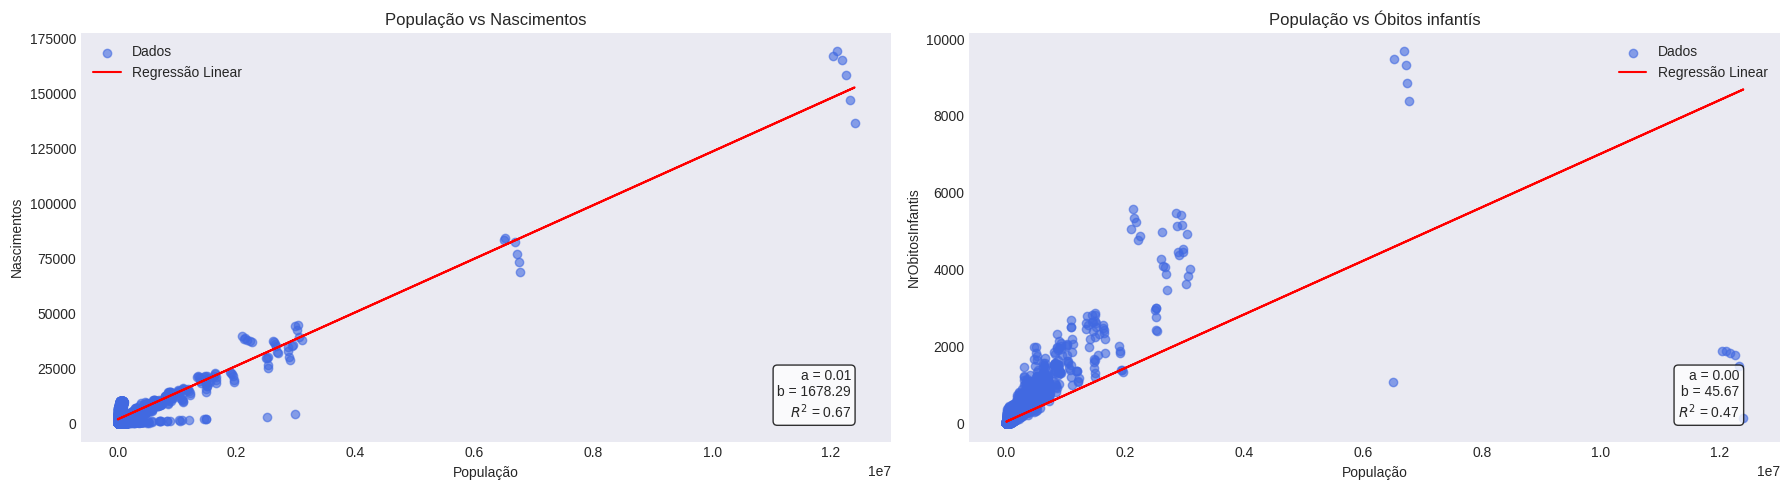

In [152]:
x1, y1 = preparar_dados(df, 'Populacao', 'NrNascimentos')
x2, y2 = preparar_dados(df, 'Populacao', 'NrObitosInfantis')

fig, axs = plt.subplots(1, 2, figsize=(18, 5))
plot_scatter_with_regression(axs[0], x1, y1, "Popula√ß√£o vs Nascimentos", "Popula√ß√£o", "Nascimentos")
plot_scatter_with_regression(axs[1], x2, y2, "Popula√ß√£o vs √ìbitos infant√≠s", "Popula√ß√£o", "NrObitosInfantis")

plt.tight_layout()
plt.show()

Assim como anteriormente, √© poss√≠vel agrupar os resultados em 3 faixas, sendo elas at√© 4.000.000, de 4.000.000 at√© 10.000.000 e acima de 10.000.000. Para uma an√°lise mais aprofundada, a quantidade de indiv√≠duos em cada um desses grupos e os resultados podem ser observados na tabela a seguir.

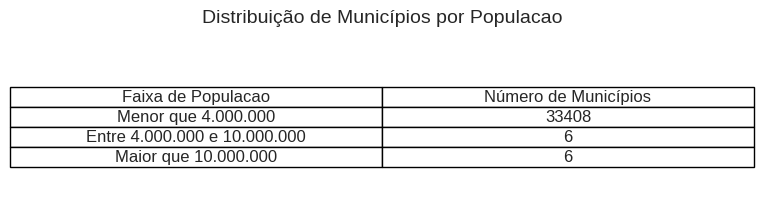

In [153]:
df_filtrado = df[['Populacao']].copy()
df_filtrado['Populacao'] = pd.to_numeric(df_filtrado['Populacao'], errors='coerce')
df_filtrado = df_filtrado.dropna().astype(int)

menor_150k = df_filtrado[df_filtrado['Populacao'] < 4000000].shape[0]
entre_150k_300k = df_filtrado[(df_filtrado['Populacao'] >=4000000) & (df_filtrado['Populacao'] <= 10000000)].shape[0]
maior_300k = df_filtrado[df_filtrado['Populacao'] > 10000000].shape[0]

tabela_empresas = pd.DataFrame({
    'Faixa de Populacao': [
        'Menor que 4.000.000',
        'Entre 4.000.000 e 10.000.000',
        'Maior que 10.000.000'
    ],
    'N√∫mero de Munic√≠pios': [
        menor_150k,
        entre_150k_300k,
        maior_300k
    ]
})


fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')


tabela = ax.table(
    cellText=tabela_empresas.values,
    colLabels=tabela_empresas.columns,
    cellLoc='center',
    loc='center'
)

tabela.auto_set_font_size(False)
tabela.set_fontsize(12)
tabela.scale(1.2, 1.2)

plt.title('Distribui√ß√£o de Munic√≠pios por Populacao', fontsize=14, pad=20)
plt.show()

Com os resultados obtidos, fica eidente que os dois √∫ltimos grupos s√£o na verdade outliers. Assim ser√£o removidos para uma an√°lise mais adequada dos fatos em sua maioria.

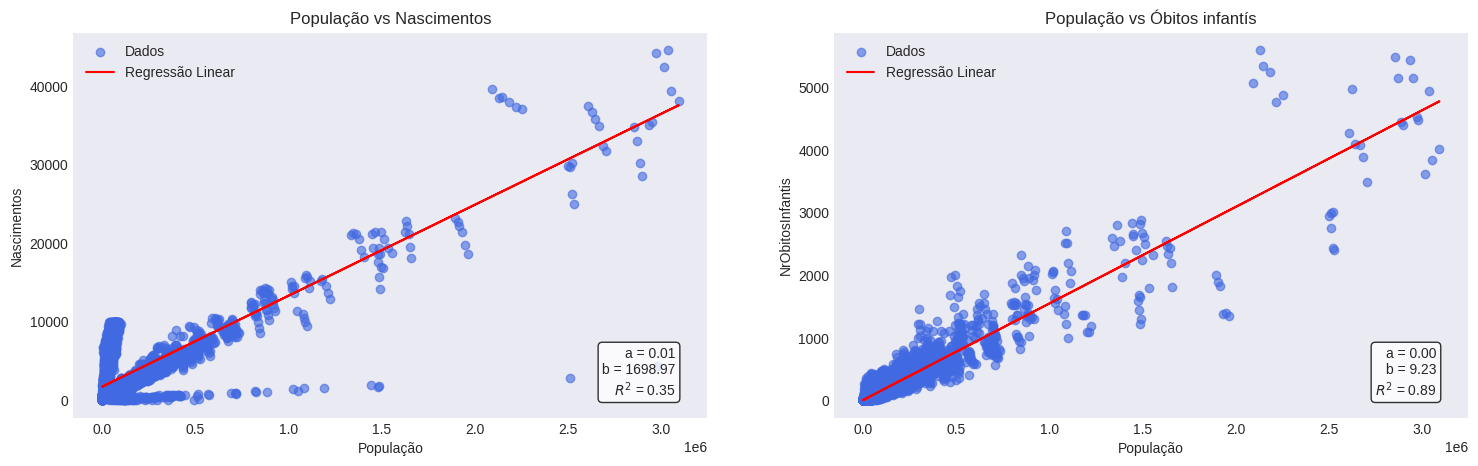

In [154]:
x1, y1 = preparar_dados(df, 'Populacao', 'NrNascimentos', filtro_x=(0, 4000000))
x2, y2 = preparar_dados(df, 'Populacao', 'NrObitosInfantis', filtro_x=(0, 4000000))

fig, axs = plt.subplots(1, 2, figsize=(18, 5))
plot_scatter_with_regression(axs[0], x1, y1, "Popula√ß√£o vs Nascimentos", "Popula√ß√£o", "Nascimentos", )
plot_scatter_with_regression(axs[1], x2, y2, "Popula√ß√£o vs √ìbitos infant√≠s", "Popula√ß√£o", "NrObitosInfantis")
qtd_y_zeros = (y1 == 8000).sum()


### Regra de associa√ß√£o

####1) Popula√ß√£o x Nascimentos

In [155]:
min_support = 0.1
min_confidence = 0.3

populacao_nascimentos_rules = analyze_associations(
    dados_binarios,
    populacao_columns,
    nascimentos_columns,
    'Faixa_Empresas',
    'Faixa_Nascimentos',
    min_support,
    min_confidence
)

show_top_rules(populacao_nascimentos_rules, 'Faixa_populacao', 'Faixa_Nascimentos')


Top 3 regras entre Faixa_populacao e Faixa_Nascimentos (por lift):
1. ['Faixa_Populacao_Baixa'] => ['Baixo']
   Lift: 2.5293, Confidence: 0.8460, Support: 0.2820
2. ['Faixa_Populacao_Alta'] => ['Alto']
   Lift: 2.2247, Confidence: 0.7388, Support: 0.2463
3. ['Faixa_Populacao_M√©dia'] => ['M√©dio']
   Lift: 2.0504, Confidence: 0.6836, Support: 0.2279


Os resultados obtidos mostram uma associa√ß√£o muito forte entre a faixa populacional dos munic√≠pios e o n√∫mero de nascimentos registrados. A principal regra indica que munic√≠pios com popula√ß√£o baixa tendem fortemente a apresentar tamb√©m um n√∫mero baixo de nascimentos (lift de 2,53 e confian√ßa de 84,6%), sugerindo uma correspond√™ncia direta entre o tamanho da popula√ß√£o e a taxa de natalidade. Da mesma forma, munic√≠pios com popula√ß√£o alta est√£o fortemente associados a um n√∫mero alto de nascimentos (lift de 2,22), e os de popula√ß√£o m√©dia a nascimentos em faixa m√©dia (lift de 2,05). Esses elevados valores de lift indicam que essas combina√ß√µes ocorrem com mais que o dobro da frequ√™ncia esperada se as vari√°veis fossem independentes. Em conjunto, os dados revelam uma forte coer√™ncia interna entre o porte populacional e o n√∫mero de nascimentos, como seria esperado em contextos demogr√°ficos, refletindo uma distribui√ß√£o proporcional entre popula√ß√£o e natalidade.

#### 2) Popula√ß√£o x √ìbitos infant√≠s

In [156]:
min_support = 0.1
min_confidence = 0.3

populacao_obitos_rules = analyze_associations(
    dados_binarios,
    populacao_columns,
    obitos_columns,
    'Faixa_Empresas',
    'Faixa_ObitosInfantis',
    min_support,
    min_confidence
)

show_top_rules(populacao_obitos_rules, 'Faixa_populacao', 'Faixa_ObitosInfantis')


Top 3 regras entre Faixa_populacao e Faixa_ObitosInfantis (por lift):
1. ['Faixa_Populacao_Alta'] => ['Alto']
   Lift: 2.4826, Confidence: 0.7226, Support: 0.2409
2. ['Faixa_Populacao_Baixa'] => ['Baixo']
   Lift: 1.8780, Confidence: 0.8413, Support: 0.2804
3. ['Faixa_Populacao_M√©dia'] => ['M√©dio']
   Lift: 1.5918, Confidence: 0.4153, Support: 0.1384


Os resultados indicam uma associa√ß√£o forte entre a faixa populacional dos munic√≠pios e os n√≠veis de √≥bitos infantis. A regra com maior lift mostra que munic√≠pios com popula√ß√£o alta tendem a apresentar tamb√©m altos √≠ndices de √≥bitos infantis (lift de 2,48 e confian√ßa de 72,26%), sugerindo que, em regi√µes mais populosas, a ocorr√™ncia de √≥bitos infantis √© proporcionalmente maior, possivelmente refletindo desafios relacionados √† densidade demogr√°fica, urbaniza√ß√£o e desigualdade no acesso √† sa√∫de. Da mesma forma, munic√≠pios com popula√ß√£o baixa est√£o fortemente associados a baixos n√≠veis de √≥bitos infantis (lift de 1,88 e confian√ßa de 84,13%), o que pode refletir tanto menor exposi√ß√£o a riscos quanto menor n√∫mero absoluto de nascimentos. J√° a associa√ß√£o entre popula√ß√£o m√©dia e √≥bitos infantis m√©dios √© mais fraca (lift de 1,59 e confian√ßa de 41,53%), mas ainda assim sugere alguma consist√™ncia. No geral, os dados revelam uma correspond√™ncia coerente entre o porte populacional e a faixa de mortalidade infantil, o que est√° de acordo com expectativas demogr√°ficas, embora fatores estruturais tamb√©m possam influenciar essas rela√ß√µes.

###Teste de hip√≥tese


As hip√≥teses formuladas e que ser√£o testadas em ambos os testes s√£o:
* **H‚ÇÄ (hip√≥tese nula):** As m√©dias de exporta√ß√£o dos dois grupos s√£o iguais.
*   **H‚ÇÅ (hip√≥tese alternativa):** As m√©dias de exporta√ß√£o s√£o diferentes entre os grupos.

In [157]:
# Select and filter the necessary columns
df_filtrado = df[['NrNascimentos', 'Populacao']].copy()
df_filtrado['NrNascimentos'] = pd.to_numeric(df_filtrado['NrNascimentos'], errors='coerce')
df_filtrado['Populacao'] = pd.to_numeric(df_filtrado['Populacao'], errors='coerce')
df_filtrado = df_filtrado.dropna().astype(int)

# Realizando o teste de correla√ß√£o de Pearson
r_pearson, p_value_pearson = stats.pearsonr(df_filtrado['NrNascimentos'], df_filtrado['Populacao'])

# Realizando o teste de correla√ß√£o de Spearman
r_spearman, p_value_spearman = stats.spearmanr(df_filtrado['NrNascimentos'], df_filtrado['Populacao'])

# Definindo o n√≠vel de signific√¢ncia
alpha = 0.05

# Resultados do teste de Pearson
print(f"Teste de Correla√ß√£o de Pearson:")
print(f"Coeficiente de correla√ß√£o (r): {r_pearson:.4f}")
print(f"Valor-p: {p_value_pearson:.4f}")
print()

# Resultados do teste de Spearman
print(f"Teste de Correla√ß√£o de Spearman:")
print(f"Coeficiente de correla√ß√£o (rho): {r_spearman:.4f}")
print(f"Valor-p: {p_value_spearman:.4f}")

Teste de Correla√ß√£o de Pearson:
Coeficiente de correla√ß√£o (r): 0.8179
Valor-p: 0.0000

Teste de Correla√ß√£o de Spearman:
Coeficiente de correla√ß√£o (rho): 0.8704
Valor-p: 0.0000


Os resultados dos testes de correla√ß√£o de Pearson e Spearman indicam uma forte rela√ß√£o positiva entre as duas vari√°veis analisadas. O coeficiente de Pearson (r = 0,8304) sugere uma correla√ß√£o linear forte, ou seja, √† medida que uma vari√°vel aumenta, a outra tamb√©m tende a aumentar de forma proporcional. J√° o coeficiente de Spearman (rho = 0,7742) confirma essa associa√ß√£o forte, mesmo considerando rela√ß√µes monot√¥nicas que n√£o necessariamente sejam lineares. Em ambos os testes, o valor-p √© 0,0000, o que indica que a correla√ß√£o observada √© estatisticamente significativa com alto grau de confian√ßa (normalmente p < 0,05 j√° √© suficiente). Portanto, podemos concluir que h√° uma associa√ß√£o positiva e significativa entre as vari√°veis analisadas.

In [158]:
# Select and filter the necessary columns
df_filtrado = df[['NrObitosInfantis', 'Populacao']].copy()
df_filtrado['NrObitosInfantis'] = pd.to_numeric(df_filtrado['NrObitosInfantis'], errors='coerce')
df_filtrado['Populacao'] = pd.to_numeric(df_filtrado['Populacao'], errors='coerce')
df_filtrado = df_filtrado.dropna().astype(int)

r_pearson, p_value_pearson = stats.pearsonr(df_filtrado['NrObitosInfantis'], df_filtrado['Populacao'])

# Realizando o teste de correla√ß√£o de Spearman (n√£o-param√©trico)
r_spearman, p_value_spearman = stats.spearmanr(df_filtrado['NrObitosInfantis'], df_filtrado['Populacao'])

# Definindo o n√≠vel de signific√¢ncia
alpha = 0.05

# Resultados do teste de Pearson
print(f"Teste de Correla√ß√£o de Pearson:")
print(f"Coeficiente de correla√ß√£o (r): {r_pearson:.4f}")
print(f"Valor-p: {p_value_pearson:.4f}")
print()

# Resultados do teste de Spearman
print(f"Teste de Correla√ß√£o de Spearman:")
print(f"Coeficiente de correla√ß√£o (rho): {r_spearman:.4f}")
print(f"Valor-p: {p_value_spearman:.4f}")

Teste de Correla√ß√£o de Pearson:
Coeficiente de correla√ß√£o (r): 0.6905
Valor-p: 0.0000

Teste de Correla√ß√£o de Spearman:
Coeficiente de correla√ß√£o (rho): 0.8055
Valor-p: 0.0000


Os testes de correla√ß√£o de Pearson e Spearman indicam uma associa√ß√£o positiva e estatisticamente significativa entre a popula√ß√£o e o n√∫mero de nascimentos. O coeficiente de Pearson (r = 0,6880) sugere uma correla√ß√£o linear moderada a forte, enquanto o coeficiente de Spearman (rho = 0,7928) revela uma correla√ß√£o ainda mais forte considerando a ordem dos dados (correla√ß√£o monot√¥nica). Em ambos os testes, o valor-p igual a 0,0000 indica que a correla√ß√£o √© altamente significativa, ou seja, √© extremamente improv√°vel que essa associa√ß√£o tenha ocorrido por acaso. Esses resultados sugerem que, em geral, munic√≠pios com maior popula√ß√£o tendem a registrar maior n√∫mero de nascimentos.

## An√°lise Final:
Com uma investiga√ß√£o dos dados, foi evidente a inexistencia de uma rela√ß√£o da quantidade de empresas em um munic√≠pio e fatores sociais, uma vez que se retirarmos ous outliears, os valores se encontram muito dispersos, fazendo com que, por exempo, ao realizarmos uma regress√£o linear dos dados o R¬≤ seja baico demonstrando pouca explica√ß√£o dos dados. Contudo ap√≥s a obten√ß√£o dos resultados da an√°lise principal, constatamos que poss√≠velmente o n√∫mero de √≥bitos infant√≠s e o n√∫mero de nascimentos poderiam esta relacionados n√£o com a quantidade de empresas e sim com a popula√ß√£o, o que a priori, mostra-se em grande parte verdade, tendo obtido resultados bem positivos nos testes realizados.



---



# Pergunta 2

> `Existe alguma rela√ß√£o entre o Produto Interno Bruto (PIB) e a taxa de exporta√ß√£o (Exportacoes_US$) dos munic√≠pios?`



## Gr√°fico Munic√≠pios

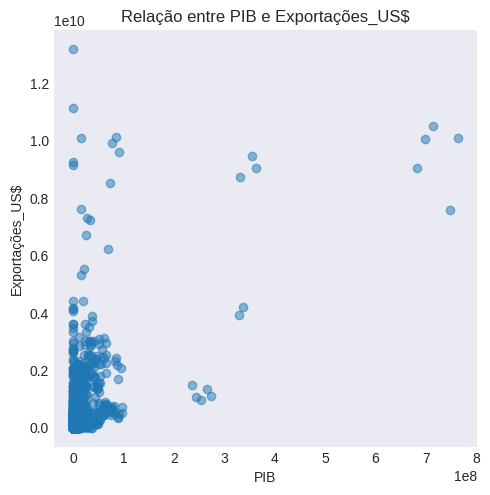

In [159]:
df_filtrado = df[['PIB', 'Exportacoes_US$']].dropna().copy()
df_filtrado['PIB'] = pd.to_numeric(df_filtrado['PIB'], errors='coerce')
df_filtrado['Exportacoes_US$'] = pd.to_numeric(df_filtrado['Exportacoes_US$'], errors='coerce')
df_filtrado = df_filtrado.dropna().astype(int)

x = df_filtrado['PIB']
y = df_filtrado['Exportacoes_US$']

# Remova a linha de regress√£o e o intervalo de confian√ßa definindo fit_reg=False
sns.lmplot(x='PIB', y='Exportacoes_US$', data=df_filtrado, scatter_kws={'alpha':0.5}, fit_reg=False)
plt.title('Rela√ß√£o entre PIB e Exporta√ß√µes_US$')
plt.xlabel('PIB')
plt.ylabel('Exporta√ß√µes_US$')
plt.grid(False)
plt.show()

## An√°lise:
Analisando apenas o gr√°fico de dispers√£o, d√° pra perceber que existe uma tend√™ncia de que, conforme o PIB dos munic√≠pios aumenta, o valor das exporta√ß√µes tamb√©m tende a crescer. Isso indica uma poss√≠vel correla√ß√£o positiva entre as vari√°veis. No entanto, essa rela√ß√£o n√£o √© muito forte, j√° que h√° muita varia√ß√£o nos pontos, principalmente nos munic√≠pios com PIB mais baixo ‚Äî alguns exportam bastante, outros quase nada. Tamb√©m d√° pra notar alguns casos bem fora da curva. Ent√£o, mesmo que exista uma tend√™ncia geral de crescimento conjunto, ela n√£o √© uniforme nem t√£o clara assim.


## Gr√°ficos Regi√µes

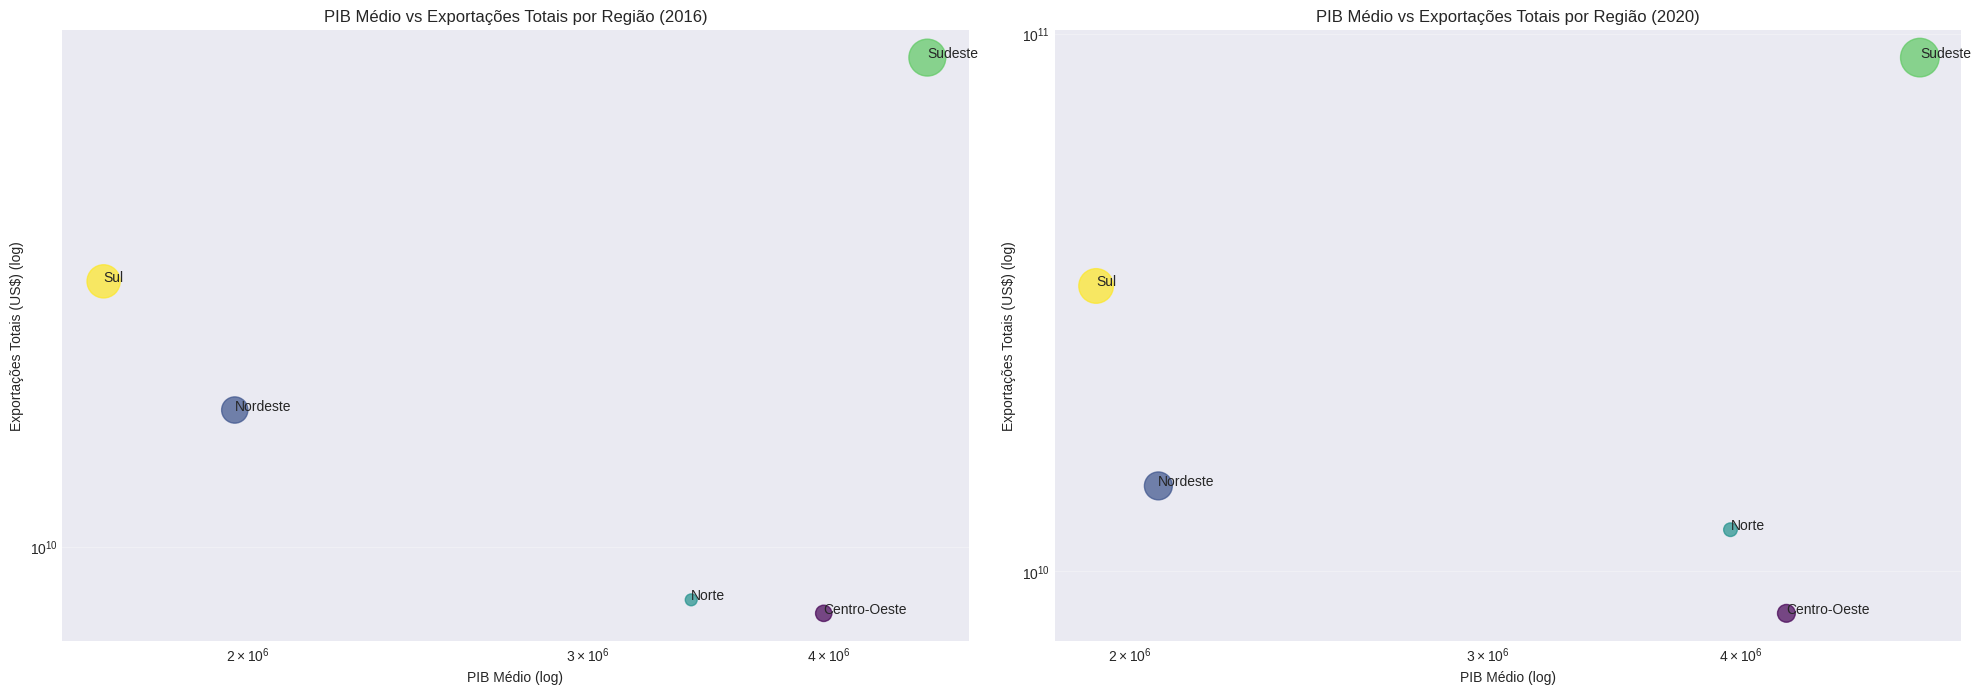

In [160]:
plt.figure(figsize=(20, 20))

# Gr√°fico de bolhas para 2016
plt.subplot(3, 2, 1)
# Use 'df' instead of the undefined 'df_export'
df_2016 = df[(df['Ano'] == 2016) &
                    (df['Exportacoes_US$'] > 0) &
                    (df['PIB'] > 0)]

# Agrupando por regi√£o e calculando m√©dia de PIB, soma de exporta√ß√µes e contagem de munic√≠pios
regioes_2016 = df_2016.groupby('Regiao').agg({
    'PIB': 'mean',
    'Exportacoes_US$': 'sum',
    'CDMunicipio': 'count'  # Assumindo que existe uma coluna 'Municipio'
}).reset_index().rename(columns={'CDMunicipio': 'Municipio'}) # Renomear para 'Municipio' se necess√°rio

# Criando gr√°fico de bolhas
plt.scatter(regioes_2016['PIB'], regioes_2016['Exportacoes_US$'],
           s=regioes_2016['Municipio'],  # Tamanho proporcional ao n√∫mero de munic√≠pios
           alpha=0.7,
           c=range(len(regioes_2016)),  # Cores diferentes por regi√£o
           cmap='viridis')

# Adicionando r√≥tulos para cada regi√£o
for i, row in regioes_2016.iterrows():
    plt.annotate(row['Regiao'],
                (row['PIB'], row['Exportacoes_US$']),
                fontsize=10)

plt.xscale('log')
plt.yscale('log')
plt.title('PIB M√©dio vs Exporta√ß√µes Totais por Regi√£o (2016)')
plt.xlabel('PIB M√©dio (log)')
plt.ylabel('Exporta√ß√µes Totais (US$) (log)')
plt.grid(True, alpha=0.3)

# Gr√°fico de bolhas para 2020
plt.subplot(3, 2, 2)
# Use 'df' instead of the undefined 'df_export'
df_2020 = df[(df['Ano'] == 2020) &
                    (df['Exportacoes_US$'] > 0) &
                    (df['PIB'] > 0)]

# Agrupando por regi√£o e calculando m√©dia de PIB, soma de exporta√ß√µes e contagem de munic√≠pios
regioes_2020 = df_2020.groupby('Regiao').agg({
    'PIB': 'mean',
    'Exportacoes_US$': 'sum',
    'CDMunicipio': 'count'  # Assumindo que existe uma coluna 'Municipio'
}).reset_index().rename(columns={'CDMunicipio': 'Municipio'}) # Renomear para 'Municipio' se necess√°rio

# Criando gr√°fico de bolhas
plt.scatter(regioes_2020['PIB'], regioes_2020['Exportacoes_US$'],
           s=regioes_2020['Municipio'],  # Tamanho proporcional ao n√∫mero de munic√≠pios
           alpha=0.7,
           c=range(len(regioes_2020)),  # Cores diferentes por regi√£o
           cmap='viridis')

# Adicionando r√≥tulos para cada regi√£o
for i, row in regioes_2020.iterrows():
    plt.annotate(row['Regiao'],
                (row['PIB'], row['Exportacoes_US$']),
                fontsize=10)

plt.xscale('log')
plt.yscale('log')
plt.title('PIB M√©dio vs Exporta√ß√µes Totais por Regi√£o (2020)')
plt.xlabel('PIB M√©dio (log)')
plt.ylabel('Exporta√ß√µes Totais (US$) (log)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## An√°lise
Ao analisar os gr√°ficos comparativos entre o PIB m√©dio e as exporta√ß√µes totais por regi√£o nos anos de 2016 e 2020, observa-se uma poss√≠vel correla√ß√£o entre o crescimento do PIB e o aumento das exporta√ß√µes, especialmente na regi√£o Norte, que apresentou evolu√ß√£o significativa em ambos os indicadores. Isso sugere que, em alguns contextos regionais, o aumento das exporta√ß√µes pode estar associado ao crescimento econ√¥mico local. No entanto, essa rela√ß√£o n√£o √© uniforme entre as regi√µes: o Centro-Oeste, por exemplo, manteve um PIB m√©dio elevado, mas com menor volume de exporta√ß√µes, o que indica que sua economia pode estar mais voltada ao mercado interno ou a setores que n√£o se refletem diretamente em exporta√ß√µes. J√° o Sudeste, com o maior PIB m√©dio e volume de exporta√ß√µes, refor√ßa a ideia de que munic√≠pios com maior atividade exportadora tendem a ter maior gera√ß√£o de riqueza. Assim, pode-se concluir que existe uma rela√ß√£o entre o PIB e a taxa de exporta√ß√£o em muitos munic√≠pios, embora fatores como estrutura econ√¥mica e perfil produtivo regional tamb√©m influenciem essa din√¢mica.

## Infer√™ncia Estat√≠stica

### Pr√©-processamento dos Dados:

In [161]:
# Mant√©m apenas registros com valores positivos
df_teste = df[(df['PIB'] > 0) & (df['Exportacoes_US$'] > 0)].copy()

# Remove valores ausentes
df_teste = df_teste.dropna(subset=['PIB', 'Exportacoes_US$'])

In [162]:
# Cria√ß√£o de duas amostras: munic√≠pios com PIB acima da mediana e abaixo da mediana.
mediana_pib = df_teste['PIB'].median()
grupo_alto = df_teste[df_teste['PIB'] > mediana_pib]['Exportacoes_US$']
grupo_baixo = df_teste[df_teste['PIB'] <= mediana_pib]['Exportacoes_US$']

### Formula√ß√£o da Hip√≥teses:
Queremos testar se h√° diferen√ßa significativa entre as exporta√ß√µes m√©dias dos dois grupos:

*   **H‚ÇÄ (hip√≥tese nula):** As m√©dias de exporta√ß√£o dos dois grupos s√£o iguais.
*   **H‚ÇÅ (hip√≥tese alternativa):** As m√©dias de exporta√ß√£o s√£o diferentes entre os grupos.


### Estat√≠stica Descritiva:
| M√©trica                    | PIB Baixo            | PIB Alto            |
| -------------------------- | -------------------- | ------------------- |
| M√©dia amostral (ùë•ÃÑ)         | `grupo_baixo.mean()` | `grupo_alto.mean()` |
| Tamanho da amostra (n)     | `len(grupo_baixo)`   | `len(grupo_alto)`   |
| Desvio padr√£o (œÉ estimado) | `grupo_baixo.std()`  | `grupo_alto.std()`  |


In [163]:
media_baixo = grupo_baixo.mean()
desvio_baixo = grupo_baixo.std()
n_baixo = len(grupo_baixo)

media_alto = grupo_alto.mean()
desvio_alto = grupo_alto.std()
n_alto = len(grupo_alto)

# Impress√£o formatada
print("=== MUNIC√çPIOS COM PIB BAIXO ===")
print(f"M√©dia das exporta√ß√µes: ${media_baixo:,.2f}")
print(f"Desvio padr√£o: ${desvio_baixo:,.2f}")
print(f"Tamanho da amostra (n): {n_baixo}")

print("\n=== MUNIC√çPIOS COM PIB ALTO ===")
print(f"M√©dia das exporta√ß√µes: ${media_alto:,.2f}")
print(f"Desvio padr√£o: ${desvio_alto:,.2f}")
print(f"Tamanho da amostra (n): {n_alto}")

=== MUNIC√çPIOS COM PIB BAIXO ===
M√©dia das exporta√ß√µes: $2,367,081.93
Desvio padr√£o: $12,139,278.08
Tamanho da amostra (n): 4874

=== MUNIC√çPIOS COM PIB ALTO ===
M√©dia das exporta√ß√µes: $162,964,498.38
Desvio padr√£o: $660,532,213.62
Tamanho da amostra (n): 4874


### Erro Padr√£o:
Ele representa quanto a diferen√ßa entre as m√©dias pode variar devido ao acaso, baseado na variabilidade (desvio) de cada grupo.

In [164]:
# Erro padr√£o da diferen√ßa entre as m√©dias
erro_padrao = np.sqrt((desvio_baixo**2 / n_baixo) + (desvio_alto**2 / n_alto))
print(f"\nErro padr√£o da diferen√ßa entre as m√©dias: ${erro_padrao:,.2f}")


Erro padr√£o da diferen√ßa entre as m√©dias: $9,462,906.95


### Estat√≠stica t (dist√¢ncia entre as m√©dias):
A estat√≠stica t representa quantas vezes a diferen√ßa observada entre as m√©dias de dois grupos (neste caso, munic√≠pios com PIB alto e PIB baixo) √© maior do que o erro padr√£o esperado ao acaso. Em outras palavras, ela mede a "dist√¢ncia" entre as m√©dias em unidades do erro padr√£o. Por exemplo, se a dist√¢ncia t for 6.84, isso indica que a diferen√ßa entre as m√©dias √© 6,84 vezes maior do que o esperado por varia√ß√£o aleat√≥ria, sugerindo uma diferen√ßa consistente e relevante. Quanto maior esse valor, mais improv√°vel √© que a diferen√ßa entre os grupos tenha ocorrido por sorte.

In [165]:
# Diferen√ßa entre as m√©dias
media_baixo = grupo_baixo.mean()
media_alto = grupo_alto.mean()
diferenca_medias = media_alto - media_baixo

# Estat√≠stica t (dist√¢ncia)
t_stat = diferenca_medias / erro_padrao
print(f"Dist√¢ncia entre as m√©dias em erros padr√£o (t): {t_stat:.4f}")

Dist√¢ncia entre as m√©dias em erros padr√£o (t): 16.9713


### Teste t de Student (valor-p):
O teste t de Student avalia se a diferen√ßa entre as m√©dias de dois grupos √© estatisticamente significativa. Ele testa a hip√≥tese nula de que as m√©dias s√£o iguais, ou seja, que n√£o h√° diferen√ßa real entre os grupos. O resultado do teste √© o valor-p, que representa a probabilidade de observar uma diferen√ßa t√£o grande quanto a encontrada (ou maior), assumindo que a hip√≥tese nula √© verdadeira. Um valor-p baixo (ex: < 0,05) indica que √© muito improv√°vel que a diferen√ßa tenha ocorrido por acaso, levando √† rejei√ß√£o da hip√≥tese nula. No seu caso, um valor-p pr√≥ximo de zero mostra evid√™ncia forte de que h√°, sim, uma diferen√ßa significativa nas exporta√ß√µes entre munic√≠pios com PIB alto e baixo.

In [166]:
# Teste t de Student (bilateral, vari√¢ncias diferentes)
t_stat_test, p_valor = ttest_ind(grupo_alto, grupo_baixo, equal_var=False)
print(f"Valor-p do teste t (hip√≥tese nula: m√©dias iguais): {p_valor:.4f}")

Valor-p do teste t (hip√≥tese nula: m√©dias iguais): 0.0000


## Conclus√£o:
Com base na an√°lise estat√≠stica realizada, conclui-se que h√° uma diferen√ßa significativa entre as exporta√ß√µes dos munic√≠pios com PIB alto e daqueles com PIB baixo. A dist√¢ncia entre as m√©dias, expressa em unidades de erro padr√£o, foi de aproximadamente 16,97, um valor bastante elevado que indica uma discrep√¢ncia expressiva entre os dois grupos. Al√©m disso, o valor-p do teste t foi menor que 0,0001, o que refor√ßa que essa diferen√ßa dificilmente ocorreu por acaso. Portanto, rejeitamos a hip√≥tese nula de que as m√©dias s√£o iguais, concluindo que o PIB tem influ√™ncia direta sobre a taxa de exporta√ß√µes dos munic√≠pios analisados. Essa evid√™ncia estat√≠stica sustenta a ideia de que munic√≠pios economicamente mais fortes tendem a exportar mais.

## Regra de Associa√ß√£o

### Explica√ß√£o das linhas de c√≥digo a seguir:
Neste trecho de c√≥digo, foi criada uma nova base (df_apriori) contendo apenas os munic√≠pios com valores positivos de PIB e exporta√ß√µes, excluindo tamb√©m eventuais dados ausentes nessas colunas. Em seguida, o PIB e as exporta√ß√µes foram categorizados em tr√™s faixas (baixo, m√©dio e alto) com base em tercis, ou seja, cada categoria cont√©m aproximadamente um ter√ßo dos munic√≠pios. Isso permite transformar os dados cont√≠nuos em dados categ√≥ricos, facilitando a aplica√ß√£o de algoritmos de regras de associa√ß√£o como o Apriori.

In [167]:
# Filtra os munic√≠pios com PIB e exporta√ß√µes maiores que zero
dados_filtrados = df[(df['PIB'] > 0) & (df['Exportacoes_US$'] > 0)].copy()

# Remove valores ausentes nas colunas de interesse
dados_filtrados = dados_filtrados.dropna(subset=['PIB', 'Exportacoes_US$'])

# Classifica o PIB e as exporta√ß√µes em tr√™s faixas: baixo, m√©dio e alto (tercis)
dados_filtrados['Faixa_PIB'] = pd.qcut(dados_filtrados['PIB'], q=3, labels=["PIB_baixo", "PIB_medio", "PIB_alto"])
dados_filtrados['Faixa_Exportacoes'] = pd.qcut(dados_filtrados['Exportacoes_US$'], q=3, labels=["EXP_baixo", "EXP_medio", "EXP_alto"])

### Explica√ß√£o das linhas de c√≥digo a seguir:
DataFrame df_apriori, que cont√©m as categorias de PIB e exporta√ß√µes, foi transformado em um novo DataFrame chamado df_transacoes utilizando a fun√ß√£o pd.get_dummies(). Essa fun√ß√£o converte as categorias (como "PIB_alto" ou "EXP_baixo") em colunas bin√°rias (0 ou 1), indicando a presen√ßa ou aus√™ncia de cada categoria em cada linha. O resultado √© uma matriz no formato adequado para aplicar algoritmos de minera√ß√£o de padr√µes, como o Apriori, que exigem dados transacionais com atributos bin√°rios.

In [168]:
# Converte as categorias para o formato de vari√°veis bin√°rias (0 ou 1)
dados_binarios = pd.get_dummies(dados_filtrados[['Faixa_PIB', 'Faixa_Exportacoes']])
dados_binarios

Faixa_PIB_PIB_baixo  Faixa_PIB_PIB_medio  Faixa_PIB_PIB_alto  \
1                    False                 True               False   
6                     True                False               False   
10                   False                False                True   
15                   False                 True               False   
16                   False                 True               False   
...                    ...                  ...                 ...   
15529                 True                False               False   
15530                 True                False               False   
15531                 True                False               False   
15532                False                 True               False   
15533                 True                False               False   

       Faixa_Exportacoes_EXP_baixo  Faixa_Exportacoes_EXP_medio  \
1                            False                         True   
6                             True                        False   
10                           False                         True   
15                            True                        False   
16                            True                        False   
...                            ...                          ...   
15529                         True                        False   
15530                        False                         True   
15531                        False                         True   
15532                         True                        False   
15533                        False                         True   

       Faixa_Exportacoes_EXP_alto  
1                           False  
6                           False  
10                          False  
15                          False  
16                          False  
...                           ...  
15529                       False  
15530                       False  
15531                       False  
15532                       False  
15533                       False  

[9748 rows x 6 columns]

### Explica√ß√£o das linhas de c√≥digo a seguir:
Neste trecho, foi aplicado o algoritmo Apriori sobre os dados bin√°rios para identificar conjuntos frequentes de categorias de PIB e exporta√ß√µes, considerando apenas aqueles que ocorrem em pelo menos 10% dos munic√≠pios (min_support=0.1). Com esses conjuntos, s√£o geradas regras de associa√ß√£o com confian√ßa m√≠nima de 60%, ou seja, regras em que a ocorr√™ncia do antecedente implica no consequente com pelo menos 60% de probabilidade. Em seguida, as regras s√£o ordenadas da maior para a menor confian√ßa, e s√£o exibidas as colunas principais.


In [169]:
# Aplica o algoritmo Apriori para encontrar combina√ß√µes frequentes
conjuntos_frequentes = apriori(dados_binarios, min_support=0.1, use_colnames=True)

# Gera regras de associa√ß√£o com base nos conjuntos frequentes
regras_associacao = association_rules(conjuntos_frequentes, metric="confidence", min_threshold=0.6) #limiar m√≠nimo de confian√ßa de 60%

# Ordena as regras por confian√ßa (do maior para o menor)
regras_associacao.sort_values(by="confidence", ascending=False, inplace=True)

# Exibe as principais colunas das regras encontradas
regras_associacao[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

antecedents                    consequents   support  \
3           (Faixa_PIB_PIB_alto)   (Faixa_Exportacoes_EXP_alto)  0.243537   
2   (Faixa_Exportacoes_EXP_alto)           (Faixa_PIB_PIB_alto)  0.243537   
1  (Faixa_Exportacoes_EXP_baixo)          (Faixa_PIB_PIB_baixo)  0.202298   
0          (Faixa_PIB_PIB_baixo)  (Faixa_Exportacoes_EXP_baixo)  0.202298   

   confidence      lift  
3    0.730462  2.190935  
2    0.730462  2.190935  
1    0.606956  1.821055  
0    0.606956  1.821055

### Analise dos resultados:

No resultado da execu√ß√£o do algoritmo Apriori, temos as seguintes colunas:

*   **antecedents (antecedente):** conjunto(s) de item(s) que antecedem a regra. Por exemplo, (Faixa_PIB_PIB_alto) significa que o munic√≠pio foi classificado com PIB alto.

*   **consequents (consequente):** conjunto(s) de item(s) que aparecem como consequ√™ncia da regra. Ex: (Faixa_Exportacoes_EXP_alto) indica exporta√ß√µes altas.

*   **support (suporte):** propor√ß√£o de munic√≠pios que apresentam tanto o antecedente quanto o consequente. Por exemplo, 0.243537 significa que cerca de 24,35% dos munic√≠pios t√™m PIB alto e exporta√ß√µes altas.

*   **confidence (confian√ßa):** probabilidade condicional do consequente ocorrer, dado que o antecedente ocorreu. Por exemplo, uma confian√ßa de 0.730462 indica que 73,05% dos munic√≠pios com PIB alto tamb√©m t√™m exporta√ß√µes altas.

*   lift: mede a for√ßa da associa√ß√£o, comparando a regra com a aleatoriedade. Um valor acima de 1 indica que a associa√ß√£o √© positiva.


## Conclus√£o:
As regras de associa√ß√£o revelam um padr√£o claro: munic√≠pios com PIB alto tendem fortemente a tamb√©m possuir exporta√ß√µes altas, e o mesmo vale para PIB baixo e exporta√ß√µes baixas. Isso indica uma rela√ß√£o consistente entre os n√≠veis dessas duas vari√°veis, refor√ßando que o desempenho econ√¥mico dos munic√≠pios est√° associado √† sua capacidade exportadora. O lift superior a 2 refor√ßa que esses padr√µes s√£o significativamente mais prov√°veis do que ocorr√™ncias ao acaso.

## Regress√£o Linear

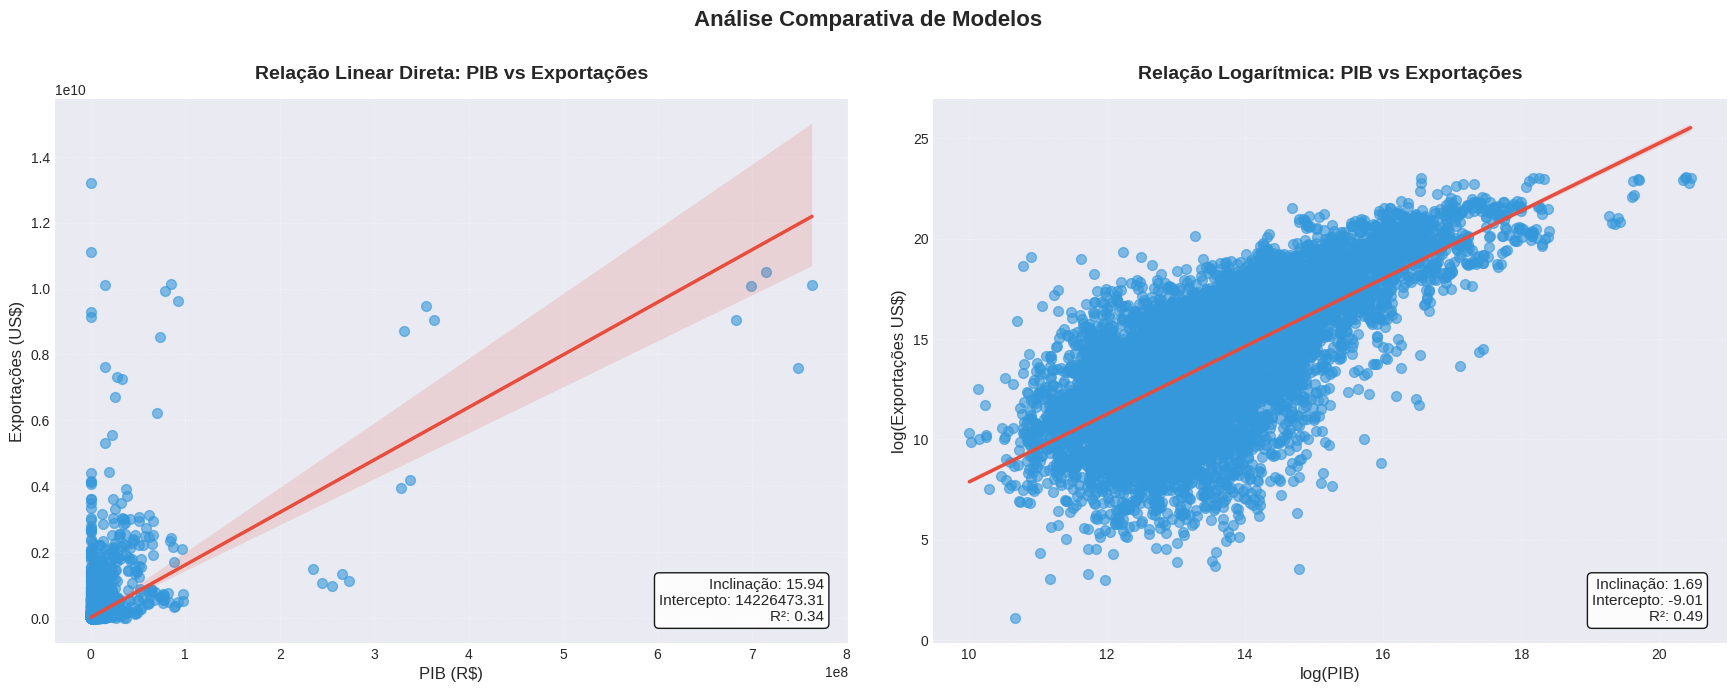

In [170]:
# Configura√ß√µes de estilo
COR_SCATTER = '#3498db'  # Azul consistente
COR_LINHA = '#e74c3c'    # Vermelho consistente
plt.style.use('seaborn-v0_8-darkgrid')

# Criar figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# --- Gr√°fico 1: Dados originais ---
sns.regplot(
    x='PIB',
    y='Exportacoes_US$',
    data=df_filtrado,
    scatter_kws={'alpha': 0.6, 'color': COR_SCATTER, 's': 50},
    line_kws={'color': COR_LINHA, 'linewidth': 2.5},
    ci=95,
    ax=ax1
)

ax1.set_title('Rela√ß√£o Linear Direta: PIB vs Exporta√ß√µes', fontsize=14, pad=15, fontweight='bold')
ax1.set_xlabel('PIB (R$)', fontsize=12)
ax1.set_ylabel('Exporta√ß√µes (US$)', fontsize=12)
ax1.grid(True, linestyle=':', alpha=0.4)

# C√°lculo e estat√≠sticas para gr√°fico 1
slope, intercept, r_value, p_value, std_err = stats.linregress(df_filtrado['PIB'], df_filtrado['Exportacoes_US$'])
r2 = r_value**2

# Caixa de texto com estat√≠sticas
stats_text1 = (f"Inclina√ß√£o: {slope:.2f}\n"
               f"Intercepto: {intercept:.2f}\n"
               f"R¬≤: {r2:.2f}")
ax1.text(0.97, 0.12, stats_text1, transform=ax1.transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# --- Gr√°fico 2: Dados transformados (log) ---
df_filtered_numeric = df_filtrado.copy()
df_filtered_numeric['log_PIB'] = np.log(df_filtered_numeric['PIB'])
df_filtered_numeric['log_Exportacoes_US$'] = np.log(df_filtered_numeric['Exportacoes_US$'])
df_filtered_numeric = df_filtered_numeric.replace([np.inf, -np.inf], np.nan).dropna()
# Garantir que n√£o h√° valores infinitos ou NaN
df_filtered_numeric = df_filtered_numeric.replace([np.inf, -np.inf], np.nan).dropna()

# Calcular a regress√£o para os dados transformados
slope_log, intercept_log, r_value_log, p_value_log, std_err_log = stats.linregress(
    df_filtered_numeric['log_PIB'],
    df_filtered_numeric['log_Exportacoes_US$']
)
r2_log = r_value_log**2

# Plotar o gr√°fico de regress√£o log
sns.regplot(
    x='log_PIB',
    y='log_Exportacoes_US$',
    data=df_filtered_numeric,
    scatter_kws={'alpha': 0.6, 'color': COR_SCATTER, 's': 50},
    line_kws={'color': COR_LINHA, 'linewidth': 2.5},
    ci=95,
    ax=ax2
)

ax2.set_title('Rela√ß√£o Logar√≠tmica: PIB vs Exporta√ß√µes', fontsize=14, pad=15, fontweight='bold')
ax2.set_xlabel('log(PIB)', fontsize=12)
ax2.set_ylabel('log(Exporta√ß√µes US$)', fontsize=12)
ax2.grid(True, linestyle=':', alpha=0.4)

# Caixa de texto com estat√≠sticas
stats_text2 = (f"Inclina√ß√£o: {slope_log:.2f}\n"
               f"Intercepto: {intercept_log:.2f}\n"
               f"R¬≤: {r2_log:.2f}")
ax2.text(0.97, 0.12, stats_text2, transform=ax2.transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# Ajustes finais
plt.tight_layout(pad=3.0)
fig.suptitle('An√°lise Comparativa de Modelos', y=1.02, fontsize=16, fontweight='bold')

plt.show()

## An√°lise:
Com base na an√°lise inicial do gr√°fico de dispers√£o linear, √© evidente que existe uma rela√ß√£o positiva entre o Produto Interno Bruto (PIB) e as Exporta√ß√µes dos munic√≠pios: √† medida que o PIB aumenta, as exporta√ß√µes tamb√©m demonstram uma tend√™ncia de crescimento, refletida na inclina√ß√£o positiva da linha de regress√£o que representa a tend√™ncia m√©dia. No entanto, a dispers√£o significativa dos pontos, particularmente em munic√≠pios de menor PIB, sugere que essa correla√ß√£o n√£o √© forte nem perfeitamente uniforme, indicando varia√ß√µes individuais consider√°veis e uma rela√ß√£o linear que explica apenas parte da variabilidade total. Complementando essa observa√ß√£o visual com a an√°lise quantitativa dos par√¢metros de regress√£o (inclina√ß√£o a, intercepto b e R¬≤), a compara√ß√£o com o modelo logar√≠tmico revela que a rela√ß√£o entre PIB e Exporta√ß√µes se ajusta substancialmente melhor a um modelo n√£o linear, onde a varia√ß√£o percentual no PIB impacta a varia√ß√£o percentual nas Exporta√ß√µes. O R¬≤ superior no modelo logar√≠tmico confirma que essa transforma√ß√£o explica uma propor√ß√£o significativamente maior da variabilidade nas exporta√ß√µes do que o modelo linear simples, sugerindo que, embora uma correla√ß√£o positiva exista em ambos os cen√°rios, a din√¢mica econ√¥mica entre PIB e exporta√ß√£o √© mais bem capturada por uma rela√ß√£o multiplicativa ou de pot√™ncia do que por uma proporcionalidade direta.
(Nesta an√°lise, o R¬≤ indica a porcentagem da varia√ß√£o total nas Exporta√ß√µes que pode ser explicada pelas varia√ß√µes no PIB, demonstrando o qu√£o bem o modelo de regress√£o se ajusta aos dados)



---



# Pergunta 3


> `Existe uma grande discrep√¢ncia entre o PIB da regi√£o mais desenvolvida do Brasil, no caso referimos ao Sudeste, com as demais regi√µes que comp√µem o pa√≠s?`



## Gr√°fico

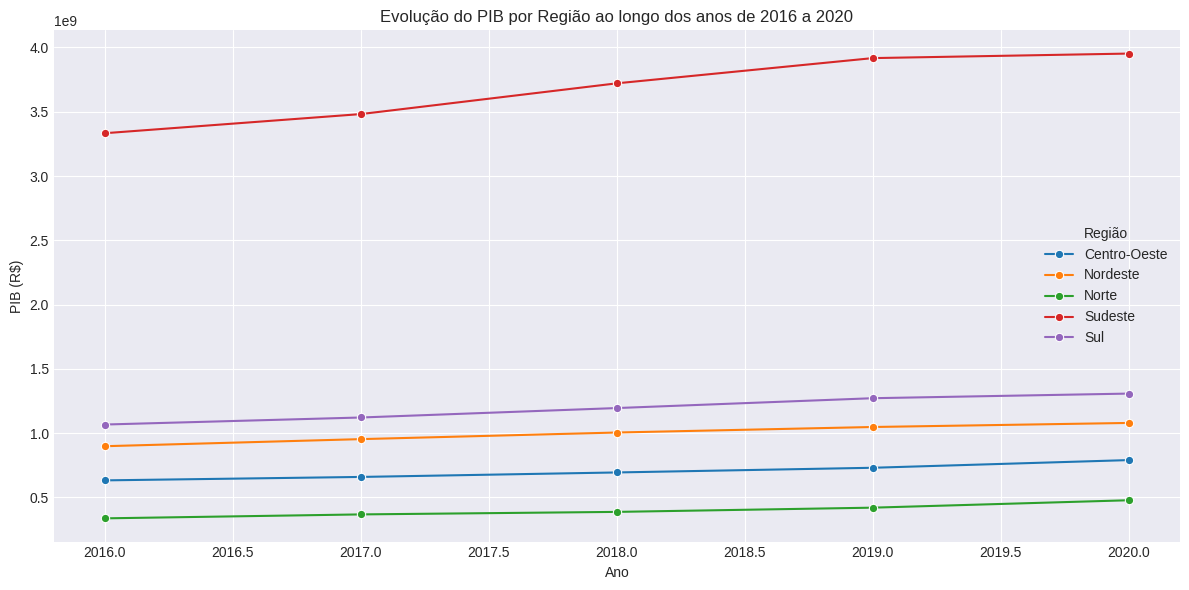

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remover o ano de 2021
df_filtrado = df[df['Ano'] != 2021]

# Agrupar os dados por Ano e Regi√£o, somando o PIB
df_agrupado = df_filtrado.groupby(['Ano', 'Regiao'])['PIB'].sum().reset_index()

# Plotar gr√°fico de linhas com bolinhas
plt.figure(figsize=(12,6))
sns.lineplot(data=df_agrupado, x='Ano', y='PIB', hue='Regiao', marker='o', palette='tab10')

plt.title('Evolu√ß√£o do PIB por Regi√£o ao longo dos anos de 2016 a 2020')
plt.xlabel('Ano')
plt.ylabel('PIB (R$)')
plt.grid(True)
plt.legend(title='Regi√£o')
plt.tight_layout()
plt.show()


## An√°lise:
Com base no gr√°fico de linhas e marcadores elaborado a partir dos dados, √© poss√≠vel observar uma discrep√¢ncia significativa entre o PIB da regi√£o Sudeste e das demais regi√µes do Brasil. O Sudeste apresenta valores de PIB consistentemente mais altos ao longo dos anos, distanciando-se com clareza das regi√µes Sul, Nordeste, Centro-Oeste e, principalmente, Norte. Essa diferen√ßa evidencia o maior grau de desenvolvimento econ√¥mico da regi√£o Sudeste em compara√ß√£o com as demais. A disparidade sugere uma concentra√ß√£o de atividade econ√¥mica, industrializa√ß√£o e investimentos nessa regi√£o.

## Teste de hip√≥tese

* **H‚ÇÄ: A m√©dia do PIB do Sudeste n√£o √© significativamente diferente das m√©dias das outras regi√µes.**

* **H‚ÇÅ: A m√©dia do PIB do Sudeste √© significativamente maior que as m√©dias das demais regi√µes.**

In [172]:
import pandas as pd
from scipy import stats

# Filtra o DataFrame para garantir que os dados sejam v√°lidos
df['PIB'] = pd.to_numeric(df['PIB'], errors='coerce')
df = df.dropna(subset=['PIB', 'Regiao'])

# Divide o DataFrame em dois grupos: Sudeste vs Outras regi√µes
pib_sudeste = df[df['Regiao'] == 'Sudeste']['PIB']
pib_outras = df[df['Regiao'] != 'Sudeste']['PIB']

# Verifica a quantidade de dados
print(f"Entradas Sudeste: {len(pib_sudeste)} | Outras regi√µes: {len(pib_outras)}")

# Aplica o teste t de Student para amostras independentes
t_stat, p_valor = stats.ttest_ind(pib_sudeste, pib_outras, equal_var=False)  # Welch‚Äôs t-test

# Exibe os resultados
print(f"\nTeste t-Student (Sudeste vs Outras regi√µes)")
print(f"Estat√≠stica t: {t_stat:.4f}")
print(f"Valor-p: {p_valor:.4e}")

# Interpreta√ß√£o com n√≠vel de signific√¢ncia de 5%
alpha = 0.05
if p_valor < alpha:
    print("‚Üí H√° evid√™ncia estat√≠stica de que o PIB do Sudeste √© significativamente diferente.")
else:
    print("‚Üí N√£o h√° evid√™ncia estat√≠stica de diferen√ßa significativa no PIB.")


Entradas Sudeste: 10008 | Outras regi√µes: 23412

Teste t-Student (Sudeste vs Outras regi√µes)
Estat√≠stica t: 6.0387
Valor-p: 1.6051e-09
‚Üí H√° evid√™ncia estat√≠stica de que o PIB do Sudeste √© significativamente diferente.


Os resultados do teste t de Student indicam que h√° uma diferen√ßa estatisticamente significativa entre o PIB m√©dio da regi√£o Sudeste e o das demais regi√µes do Brasil. Com uma estat√≠stica t de 6.0387 e um valor-p extremamente baixo (1.6051e-09), rejeita-se a hip√≥tese nula de igualdade entre as m√©dias. Isso fornece forte evid√™ncia de que o Sudeste possui, de fato, um PIB m√©dio significativamente diferente e superior aos outros estados

##Conclus√£o
Com a an√°lise do gr√°fico e o resultado do teste de hip√≥tese aplicado, foi poss√≠vel observar que o PIB da regi√£o Sudeste √© realmente bem distoante das demais.



---



# Pergunta 4

> `As transfer√™ncias correntes (Transferencias_correntes_R$) e as transfer√™ncias capitais (Transferencias_capital_R$) tem influencia nas Receitas (Receitas_R$) dos munic√≠pios?`









## Transferencias correntes e Receitas - Gr√°fico

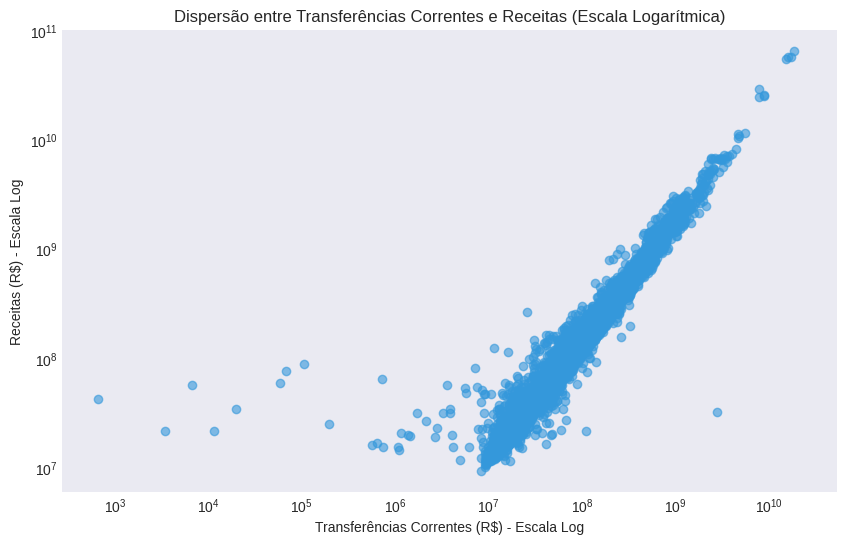

In [173]:
COR_SCATTER = '#3498db'  # Azul consistente

# Seleciona os dados que queremos
x = df['Transferencias_correntes_R$']
y = df['Receitas_R$']

# Cria o gr√°fico
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, color=COR_SCATTER)  # Use the color variable
plt.xscale('log')  # Escala logar√≠tmica no eixo X
plt.yscale('log')  # Escala logar√≠tmica no eixo Y
plt.xlabel('Transfer√™ncias Correntes (R$) - Escala Log')
plt.ylabel('Receitas (R$) - Escala Log')
plt.title('Dispers√£o entre Transfer√™ncias Correntes e Receitas (Escala Logar√≠tmica)')
plt.grid(False)
plt.show()



## An√°lise:
O gr√°fico mostra uma forte tend√™ncia positiva entre Tranfer√™ncia Corrente e Receitas dos munic√≠pios. A medida que as transfer√™ncias correntes aumentam, as receitas municipais tamb√©m aumentam de forma bastante proporcional. Apesar de alguns outliers (munic√≠pios muito acima da m√©dia), a maioria dos dados segue um padr√£o linear bem definido, indicando que as transfer√™ncias correntes influenciam fortemente as receitas dos munic√≠pios. Esse gr√°fico de dispers√£o com escala logar√≠tmica foi escolhido, pois melhora a visualiza√ß√£o quando h√° muitos pontos no canto inferior (valores pequenos) e poucos valores muito grandes (outliers), deixando as rela√ß√µes mais proporcionais. (Essas s√£o as analises preliminares e feitas a partir do gr√°fico acima).

## Transferencias correntes e Receitas - Infer√™ncia Estat√≠stica

### Pr√©-processamento dos Dados:

In [174]:
# Mant√©m apenas registros com valores positivos
df_teste = df[(df['PIB'] > 0) & (df['Transferencias_correntes_R$'] > 0)].copy()

# Remove valores ausentes
df_teste = df_teste.dropna(subset=['PIB', 'Transferencias_correntes_R$'])

In [175]:
# Criar grupos baseados na mediana das transfer√™ncias
mediana_transf = df_teste['Transferencias_correntes_R$'].median()
grupo_alto = df_teste[df_teste['Transferencias_correntes_R$'] > mediana_transf]['Receitas_R$']
grupo_baixo = df_teste[df_teste['Transferencias_correntes_R$'] <= mediana_transf]['Receitas_R$']

### Formula√ß√£o da Hip√≥teses:

Queremos investigar se as Transfer√™ncias Correntes tem influ√™ncia sobre as Receitas dos munic√≠pios:

*   **H‚ÇÄ (Hip√≥tese nula):** As transfer√™ncias correntes n√£o t√™m influ√™ncia significativa sobre as receitas dos munic√≠pios.
*   **H‚ÇÅ (Hip√≥tese alternativa):** As transfer√™ncias correntes t√™m influ√™ncia significativa sobre as receitas dos munic√≠pios.



### Estat√≠stica Descritiva:


| M√©trica                    | Transfer√™ncias Baixas            | Transfer√™ncias Altas            |
| -------------------------- | -------------------- | ------------------- |
| M√©dia amostral (ùë•ÃÑ)         | `grupo_baixo.mean()` | `grupo_alto.mean()` |
| Tamanho da amostra (n)     | `len(grupo_baixo)`   | `len(grupo_alto)`   |
| Desvio padr√£o (œÉ estimado) | `grupo_baixo.std()`  | `grupo_alto.std()`  |

In [176]:
media_baixo = grupo_baixo.mean()
desvio_baixo = grupo_baixo.std()
n_baixo = len(grupo_baixo)

media_alto = grupo_alto.mean()
desvio_alto = grupo_alto.std()
n_alto = len(grupo_alto)

# Impress√£o formatada
print("=== MUNIC√çPIOS COM TRANSFER√äNCIAS BAIXAS ===")
print(f"M√©dia das receitas: R${media_baixo:,.2f}")
print(f"Desvio padr√£o: R${desvio_baixo:,.2f}")
print(f"Tamanho da amostra (n): {n_baixo}")

print("\n=== MUNIC√çPIOS COM TRANSFER√äNCIAS ALTAS ===")
print(f"M√©dia das receitas: R${media_alto:,.2f}")
print(f"Desvio padr√£o: R${desvio_alto:,.2f}")
print(f"Tamanho da amostra (n): {n_alto}")

=== MUNIC√çPIOS COM TRANSFER√äNCIAS BAIXAS ===
M√©dia das receitas: R$20,347,947.92
Desvio padr√£o: R$12,020,612.94
Tamanho da amostra (n): 13784

=== MUNIC√çPIOS COM TRANSFER√äNCIAS ALTAS ===
M√©dia das receitas: R$179,994,370.00
Desvio padr√£o: R$1,184,022,486.76
Tamanho da amostra (n): 13783


### Erro Padr√£o e Estat√≠stica t

In [177]:
from scipy import stats # Import the stats module from scipy

# Erro padr√£o da diferen√ßa entre as m√©dias
erro_padrao = np.sqrt((desvio_baixo**2 / n_baixo) + (desvio_alto**2 / n_alto))
diferenca_medias = media_alto - media_baixo
t_stat = diferenca_medias / erro_padrao

# Graus de liberdade (aproxima√ß√£o de Welch)
gl = ((desvio_baixo**2/n_baixo + desvio_alto**2/n_alto)**2) / (
      (desvio_baixo**4/(n_baixo**2 * (n_baixo-1))) + (desvio_alto**4/(n_alto**2 * (n_alto-1))))

# Valor-p
p_valor = 1 - stats.t.cdf(t_stat, gl)

print(f"\nDiferen√ßa entre as m√©dias: R${diferenca_medias:,.2f}")
print(f"Erro padr√£o da diferen√ßa: R${erro_padrao:,.2f}")
print(f"Estat√≠stica t: {t_stat:.4f}")
print(f"Graus de liberdade: {gl:.2f}")
print(f"Valor-p: {p_valor:.6f}")


Diferen√ßa entre as m√©dias: R$159,646,422.08
Erro padr√£o da diferen√ßa: R$10,085,802.30
Estat√≠stica t: 15.8288
Graus de liberdade: 13784.84
Valor-p: 0.000000


## Conclus√£o:
Os resultados demonstram que h√° uma diferen√ßa estatisticamente significativa (t = 15.83, p-valor < 0.001) entre as receitas de munic√≠pios com transfer√™ncias correntes altas e baixas. Isso indica que as transfer√™ncias correntes t√™m uma influ√™ncia positiva e robusta nas receitas municipais, corroborando a hip√≥tese de que maiores repasses financeiros est√£o associados a um aumento significativo na arrecada√ß√£o. Portanto, rejeitamos a hip√≥tese nula (H‚ÇÄ) em favor da hip√≥tese alternativa (H‚ÇÅ) a um n√≠vel de signific√¢ncia de 5%.

## Transferencias correntes e Receitas - Regra de Associa√ß√£o

In [178]:
# Filtra os munic√≠pios com Transfer√™ncias e Receitas maiores que zero
dados_financas = df[(df['Transferencias_correntes_R$'] > 0) & (df['Receitas_R$'] > 0)].copy()

# Remove valores ausentes
dados_financas = dados_financas.dropna(subset=['Transferencias_correntes_R$', 'Receitas_R$'])

# Classifica em tercis: baixo, m√©dio e alto
dados_financas['Faixa_Transferencias'] = pd.qcut(dados_financas['Transferencias_correntes_R$'], q=3, labels=['TRANSF_baixa', 'TRANSF_media', 'TRANSF_alta'])
dados_financas['Faixa_Receitas'] = pd.qcut(dados_financas['Receitas_R$'], q=3, labels=['RECEITA_baixa', 'RECEITA_media', 'RECEITA_alta'])

In [179]:
# Transforma em vari√°veis bin√°rias
dados_binarios_financas = pd.get_dummies(dados_financas[['Faixa_Transferencias', 'Faixa_Receitas']])
dados_binarios_financas

Faixa_Transferencias_TRANSF_baixa  Faixa_Transferencias_TRANSF_media  \
0                                   True                              False   
1                                  False                               True   
2                                  False                               True   
3                                  False                              False   
4                                   True                              False   
...                                  ...                                ...   
27812                              False                               True   
27813                              False                               True   
27814                              False                              False   
27815                              False                               True   
27816                              False                               True   

       Faixa_Transferencias_TRANSF_alta  Faixa_Receitas_RECEITA_baixa  \
0                                 False                          True   
1                                 False                         False   
2                                 False                         False   
3                                  True                         False   
4                                 False                          True   
...                                 ...                           ...   
27812                             False                         False   
27813                             False                         False   
27814                              True                         False   
27815                             False                         False   
27816                             False                          True   

       Faixa_Receitas_RECEITA_media  Faixa_Receitas_RECEITA_alta  
0                             False                        False  
1                             False                         True  
2                              True                        False  
3                             False                         True  
4                             False                        False  
...                             ...                          ...  
27812                         False                         True  
27813                          True                        False  
27814                          True                        False  
27815                          True                        False  
27816                         False                        False  

[22011 rows x 6 columns]

In [180]:
# Aplica Apriori para encontrar conjuntos frequentes
conjuntos_frequentes_financas = apriori(dados_binarios_financas, min_support=0.1, use_colnames=True)

# Gera regras com confian√ßa m√≠nima de 60%
regras_financas = association_rules(conjuntos_frequentes_financas, metric='confidence', min_threshold=0.6) #limiar m√≠nimo de confian√ßa de 60%

# Ordena por confian√ßa
regras_financas.sort_values(by='confidence', ascending=False, inplace=True)

# Exibe regras principais
regras_financas[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

antecedents                          consequents  \
4   (Faixa_Transferencias_TRANSF_alta)        (Faixa_Receitas_RECEITA_alta)   
5        (Faixa_Receitas_RECEITA_alta)   (Faixa_Transferencias_TRANSF_alta)   
1  (Faixa_Transferencias_TRANSF_baixa)       (Faixa_Receitas_RECEITA_baixa)   
0       (Faixa_Receitas_RECEITA_baixa)  (Faixa_Transferencias_TRANSF_baixa)   
3  (Faixa_Transferencias_TRANSF_media)       (Faixa_Receitas_RECEITA_media)   
2       (Faixa_Receitas_RECEITA_media)  (Faixa_Transferencias_TRANSF_media)   

    support  confidence      lift  
4  0.314252    0.942756  2.828268  
5  0.314252    0.942756  2.828268  
1  0.310890    0.932670  2.798010  
0  0.310890    0.932670  2.798010  
3  0.292445    0.877334  2.632002  
2  0.292445    0.877334  2.632002

## Conclus√£o:
A an√°lise por regras de associa√ß√£o revelou uma forte rela√ß√£o entre as Transfer√™ncias Correntes recebidas pelos munic√≠pios e suas Receitas Totais. As regras com maior suporte e confian√ßa mostram que munic√≠pios com altas transfer√™ncias tendem a ter altas receitas, enquanto os que recebem poucas transfer√™ncias costumam apresentar receitas baixas. Os valores de lift acima de 2,5 em todas as regras indicam que essa associa√ß√£o √© estatisticamente relevante e muito mais frequente do que o acaso explicaria, apontando para uma forte depend√™ncia das receitas municipais em rela√ß√£o √†s transfer√™ncias recebidas.

## Regress√£o Linear

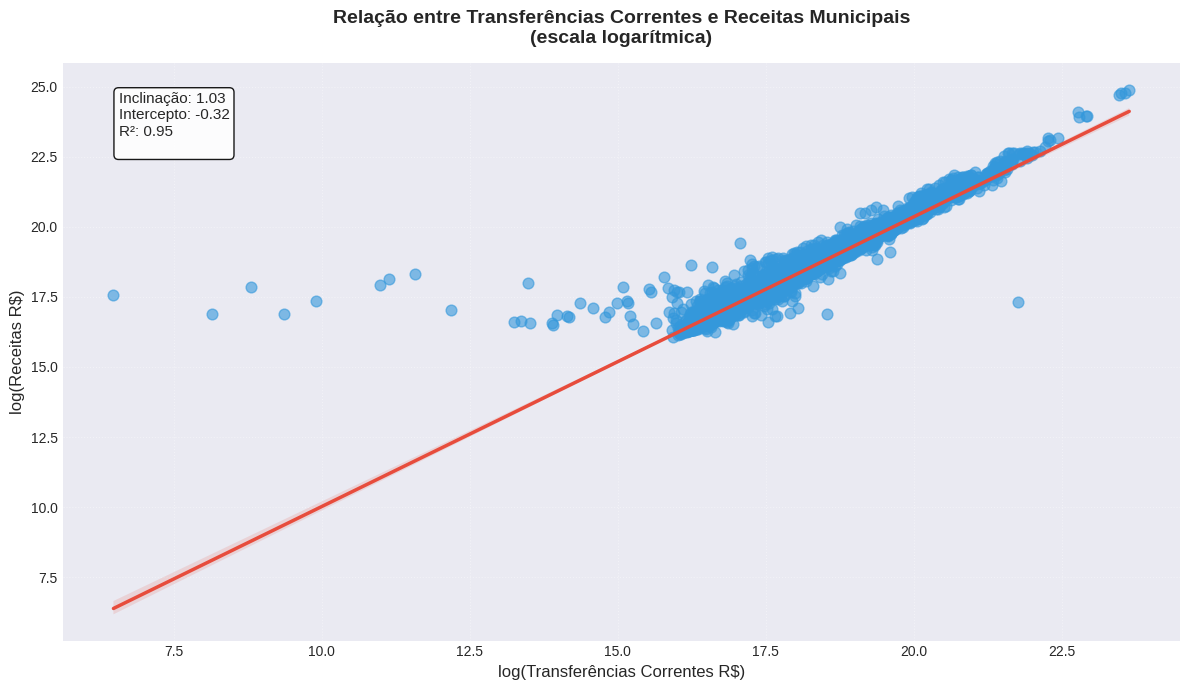

In [181]:
# Pr√©-processamento
df_filtrado = df[['Transferencias_correntes_R$', 'Receitas_R$']].dropna().copy()
df_filtrado = df_filtrado[(df_filtrado['Transferencias_correntes_R$'] > 0) &
                          (df_filtrado['Receitas_R$'] > 0)]  # Remover zeros para log

# Transforma√ß√£o logar√≠tmica
df_filtrado['log_Transferencias'] = np.log(df_filtrado['Transferencias_correntes_R$'])
df_filtrado['log_Receitas'] = np.log(df_filtrado['Receitas_R$'])

# C√°lculo da regress√£o
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df_filtrado['log_Transferencias'],
    df_filtrado['log_Receitas']
)
r2 = r_value**2

# Visualiza√ß√£o
plt.figure(figsize=(12, 7))
ax = sns.regplot(
    x='log_Transferencias',
    y='log_Receitas',
    data=df_filtrado,
    scatter_kws={'alpha': 0.6, 'color': '#3498db', 's': 60},
    line_kws={'color': '#e74c3c', 'linewidth': 2.5},
    ci=95
)

# Configura√ß√µes do gr√°fico
plt.title('Rela√ß√£o entre Transfer√™ncias Correntes e Receitas Municipais\n(escala logar√≠tmica)',
          fontsize=14, pad=15, fontweight='bold')
plt.xlabel('log(Transfer√™ncias Correntes R$)', fontsize=12)
plt.ylabel('log(Receitas R$)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.4)

# Adicionar estat√≠sticas
textstr = (f"Inclina√ß√£o: {slope:.2f}\n"
           f"Intercepto: {intercept:.2f}\n"
           f"R¬≤: {r2:.2f}\n")
plt.text(0.05, 0.95, textstr, transform=ax.transAxes,
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

plt.tight_layout()
plt.show()

## An√°lise:
A an√°lise logar√≠tmica entre Transfer√™ncias Correntes e Receitas revela uma forte rela√ß√£o linear positiva, com inclina√ß√£o (a) de 1.03, indicando que, em m√©dia, um aumento de 1% nas receitas est√° associado a um aumento de 1.03% nas transfer√™ncias. O intercepto (b) de -0.32 sugere um valor basal negativo quando as receitas s√£o m√≠nimas, enquanto o alto coeficiente de determina√ß√£o (R¬≤ = 0.95) demonstra que 95% da varia√ß√£o nas transfer√™ncias √© explicada pelas receitas, evidenciando um ajuste quase perfeito do modelo. Isso implica que pol√≠ticas p√∫blicas ou econ√¥micas que impactem as receitas municipais ter√£o um efeito direto e proporcional nas transfer√™ncias, com pouca influ√™ncia de outros fatores n√£o considerados no modelo.

## Transfer√™ncias de capital e Receitas - Gr√°fico



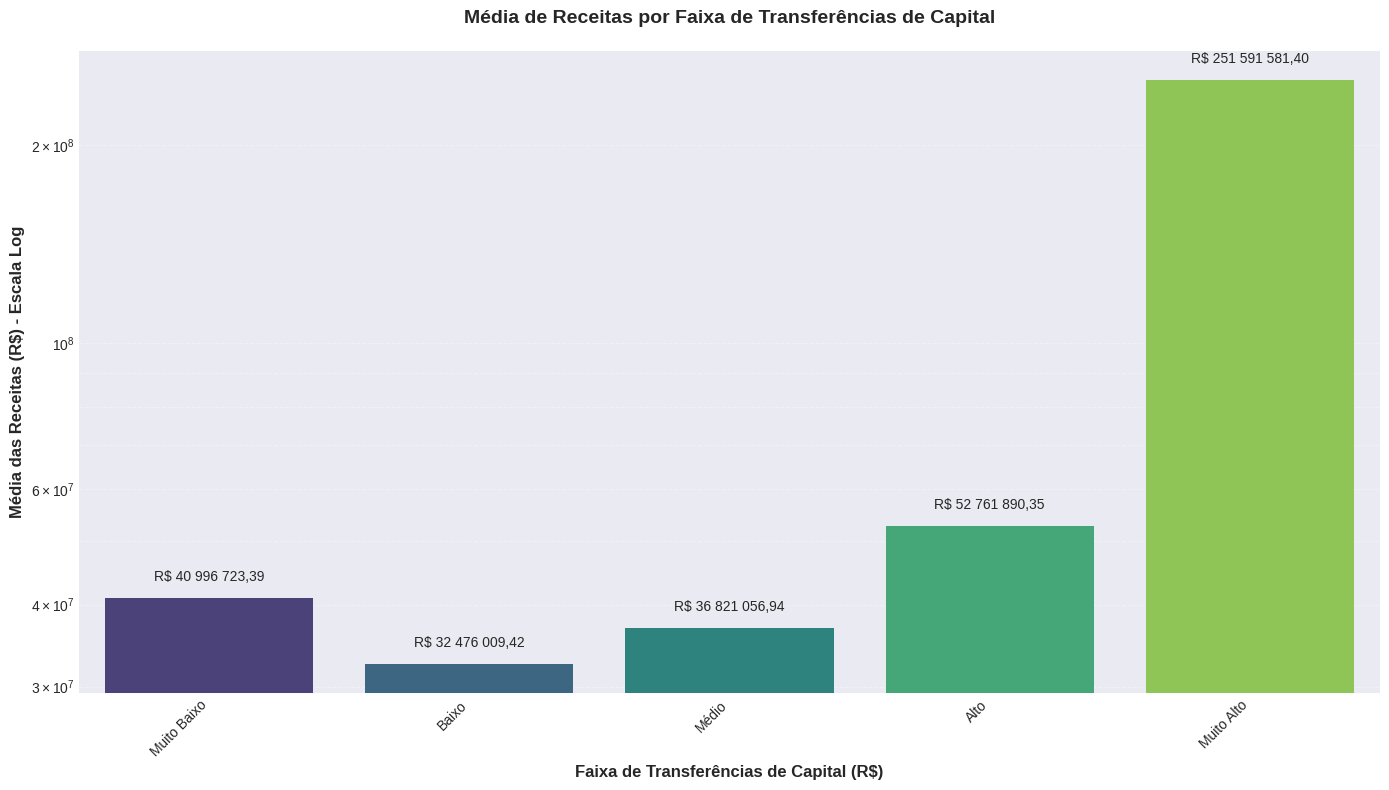

In [182]:
df['Transferencias_capital_R$'] = pd.to_numeric(df['Transferencias_capital_R$'], errors='coerce')

df_valid_transf = df.dropna(subset=['Transferencias_capital_R$']).copy()

if df_valid_transf['Transferencias_capital_R$'].nunique() < 5:
    print("Warning: Not enough unique values in 'Transferencias_capital_R$' for 5 quantiles. Using fewer bins.")
    df_valid_transf['Faixa_Transferencias_Capital'] = pd.qcut(
        df_valid_transf['Transferencias_capital_R$'],
        q=df_valid_transf['Transferencias_capital_R$'].nunique(),
        labels=False
    )

else:
    df_valid_transf['Faixa_Transferencias_Capital'] = pd.qcut(
        df_valid_transf['Transferencias_capital_R$'],
        q=5,
        labels=['Muito Baixo', 'Baixo', 'M√©dio', 'Alto', 'Muito Alto'],
        duplicates='drop'
    )

# Agrupar os dados por faixa e calcular a m√©dia das receitas
df_valid_transf['Receitas_R$'] = pd.to_numeric(df_valid_transf['Receitas_R$'], errors='coerce')
df_grouped = df_valid_transf.groupby('Faixa_Transferencias_Capital')['Receitas_R$'].mean().reset_index()


# Criar o gr√°fico de barras
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=df_grouped,
    x='Faixa_Transferencias_Capital',
    y='Receitas_R$',
    palette='viridis',
    order=['Muito Baixo', 'Baixo', 'M√©dio', 'Alto', 'Muito Alto'],
    estimator=np.mean,
    ci=None  # Removido o desvio padr√£o
)

# Configura√ß√µes do gr√°fico
plt.yscale('log')  # Mantendo escala logar√≠tmica
plt.xlabel('Faixa de Transfer√™ncias de Capital (R$)', fontsize=12, fontweight='bold')
plt.ylabel('M√©dia das Receitas (R$) - Escala Log', fontsize=12, fontweight='bold')
plt.title('M√©dia de Receitas por Faixa de Transfer√™ncias de Capital',
          fontsize=14, fontweight='bold', pad=20)

# Adicionar valores formatados nas barras
for p in ax.patches:
    height = p.get_height()

    if np.isfinite(height):
        ax.text(p.get_x() + p.get_width()/2.,
                height * 1.05,
                f'R$ {height:,.2f}'.replace(',', ' ').replace('.', ',').replace(',00', ''),
                ha='center',
                va='bottom',
                fontsize=10)

# Melhorar a apar√™ncia
sns.despine(left=True)
plt.grid(axis='y', which="both", ls="--", alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## An√°lise:
H√° uma rela√ß√£o positiva entre o valor das Transfer√™ncias de Capital e as Receitas. Conforme as transfer√™ncias aumentam (de "Muito Baixo" para "Muito Alto"), as receitas tamb√©m tendem a crescer, indicando que munic√≠pios com maiores transfer√™ncias de capital geralmente possuem receitas mais elevadas. As faixas "Muito Alto" e "Alto" apresentam maior dispers√£o nas receitas, sugerindo que, embora essas faixas tenham valores medianos mais altos, h√° uma varia√ß√£o significativa entre os munic√≠pios dentro dessas categorias. As faixas "Nuito Baixo" e "Baixo" mostram receitas mais concentradas e menores, com pouca varia√ß√£o.

## Transfer√™ncias de capital e Receitas - Infer√™ncia Estat√≠stica

### Pr√©-processamento dos Dados:

In [183]:
# Mant√©m apenas registros com valores positivos
df_teste = df[(df['PIB'] > 0) & (df['Transferencias_capital_R$'] > 0)].copy()

# Remove valores ausentes
df_teste = df_teste.dropna(subset=['PIB', 'Transferencias_capital_R$'])

In [184]:
# Criar grupos baseados na mediana das transfer√™ncias de capital
mediana_transf_capital = df_teste['Transferencias_capital_R$'].median()
grupo_alto = df_teste[df_teste['Transferencias_capital_R$'] > mediana_transf_capital]['Receitas_R$']
grupo_baixo = df_teste[df_teste['Transferencias_capital_R$'] <= mediana_transf_capital]['Receitas_R$']

### Formula√ß√£o das Hip√≥teses:
Queremos testar se as Transfer√™ncias de Capital (investimentos em infraestrutura, equipamentos, etc.) influenciam as Receitas Municipais.

*   Hip√≥tese Nula (H‚ÇÄ): N√£o h√° diferen√ßa nas receitas m√©dias entre munic√≠pios com transfer√™ncias de capital abaixo e acima da mediana.

*   Hip√≥tese Alternativa (H‚ÇÅ): Munic√≠pios com transfer√™ncias de capital acima da mediana t√™m receitas m√©dias maiores do que aqueles com transfer√™ncias abaixo da mediana.



### Estat√≠stica Descritiva:

| M√©trica                    | Transfer√™ncias Baixas            | Transfer√™ncias Altas            |
| -------------------------- | -------------------- | ------------------- |
| M√©dia amostral (ùë•ÃÑ)         | `grupo_baixo.mean()` | `grupo_alto.mean()` |
| Tamanho da amostra (n)     | `len(grupo_baixo)`   | `len(grupo_alto)`   |
| Desvio padr√£o (œÉ estimado) | `grupo_baixo.std()`  | `grupo_alto.std()`  |

In [185]:
media_baixo = grupo_baixo.mean()
desvio_baixo = grupo_baixo.std()
n_baixo = len(grupo_baixo)

media_alto = grupo_alto.mean()
desvio_alto = grupo_alto.std()
n_alto = len(grupo_alto)

# Impress√£o formatada
print("=== MUNIC√çPIOS COM TRANSFER√äNCIAS DE CAPITAL BAIXAS ===")
print(f"M√©dia das receitas: R${media_baixo:,.2f}")
print(f"Desvio padr√£o: R${desvio_baixo:,.2f}")
print(f"Tamanho da amostra (n): {n_baixo}")

print("\n=== MUNIC√çPIOS COM TRANSFER√äNCIAS DE CAPITAL ALTAS ===")
print(f"M√©dia das receitas: R${media_alto:,.2f}")
print(f"Desvio padr√£o: R${desvio_alto:,.2f}")
print(f"Tamanho da amostra (n): {n_alto}")

=== MUNIC√çPIOS COM TRANSFER√äNCIAS DE CAPITAL BAIXAS ===
M√©dia das receitas: R$38,015,587.67
Desvio padr√£o: R$94,387,751.49
Tamanho da amostra (n): 12544

=== MUNIC√çPIOS COM TRANSFER√äNCIAS DE CAPITAL ALTAS ===
M√©dia das receitas: R$169,853,537.20
Desvio padr√£o: R$1,235,151,091.76
Tamanho da amostra (n): 12544


### Erro Padr√£o e Estat√≠stica t:

In [186]:
# Calcular erro padr√£o e estat√≠stica t
erro_padrao = np.sqrt((desvio_baixo**2 / n_baixo) + (desvio_alto**2 / n_alto))
diferenca_medias = media_alto - media_baixo
t_stat = diferenca_medias / erro_padrao

# Graus de liberdade (aproxima√ß√£o de Welch-Satterthwaite)
gl = ((desvio_baixo**2/n_baixo + desvio_alto**2/n_alto)**2) / (
      (desvio_baixo**4/(n_baixo**2 * (n_baixo-1))) + (desvio_alto**4/(n_alto**2 * (n_alto-1))))

# Valor-p (teste unilateral direito)
p_valor = 1 - stats.t.cdf(t_stat, gl)

print(f"\nDiferen√ßa entre as m√©dias: R${diferenca_medias:,.2f}")
print(f"Erro padr√£o da diferen√ßa: R${erro_padrao:,.2f}")
print(f"Estat√≠stica t: {t_stat:.4f}")
print(f"Graus de liberdade: {gl:.2f}")
print(f"Valor-p (unilateral): {p_valor:.6f}")


Diferen√ßa entre as m√©dias: R$131,837,949.53
Erro padr√£o da diferen√ßa: R$11,060,288.42
Estat√≠stica t: 11.9199
Graus de liberdade: 12689.49
Valor-p (unilateral): 0.000000


## Conclus√£o:
Os resultados demonstram uma diferen√ßa altamente significativa (t = 11.92, p-valor < 0.001) entre as receitas de munic√≠pios com transfer√™ncias de capital altas e baixas. Esse achado refor√ßa a hip√≥tese de que investimentos em capital (infraestrutura, equipamentos, etc.) est√£o associados a receitas municipais substancialmente mais elevadas.

## Transfer√™ncias de capital e Receitas - Regra de Associa√ß√£o

In [187]:
# Filtra os munic√≠pios com Transfer√™ncias de Capital e Receitas maiores que zero
dados_capital = df[(df['Transferencias_capital_R$'] > 0) & (df['Receitas_R$'] > 0)].copy()

# Remove valores ausentes (NaN)
dados_capital = dados_capital.dropna(subset=['Transferencias_capital_R$', 'Receitas_R$'])

# Classifica Transfer√™ncias de Capital e Receitas em 3 faixas (tercis)
dados_capital['Faixa_TransferenciasCapital'] = pd.qcut(dados_capital['Transferencias_capital_R$'], q=3, labels=['TRANSFcap_baixa', 'TRANSFcap_media', 'TRANSFcap_alta'])
dados_capital['Faixa_Receitas'] = pd.qcut(dados_capital['Receitas_R$'], q=3, labels=['RECEITA_baixa', 'RECEITA_media', 'RECEITA_alta'])

In [188]:
# Transforma os dados categorizados em vari√°veis bin√°rias
dados_binarios_capital = pd.get_dummies(dados_capital[['Faixa_TransferenciasCapital', 'Faixa_Receitas']])
dados_binarios_capital

Faixa_TransferenciasCapital_TRANSFcap_baixa  \
0                                            False   
1                                             True   
2                                            False   
3                                            False   
4                                             True   
...                                            ...   
27812                                         True   
27813                                        False   
27814                                         True   
27815                                        False   
27816                                        False   

       Faixa_TransferenciasCapital_TRANSFcap_media  \
0                                            False   
1                                            False   
2                                             True   
3                                             True   
4                                            False   
...                                            ...   
27812                                        False   
27813                                         True   
27814                                        False   
27815                                        False   
27816                                         True   

       Faixa_TransferenciasCapital_TRANSFcap_alta  \
0                                            True   
1                                           False   
2                                           False   
3                                           False   
4                                           False   
...                                           ...   
27812                                       False   
27813                                       False   
27814                                       False   
27815                                        True   
27816                                       False   

       Faixa_Receitas_RECEITA_baixa  Faixa_Receitas_RECEITA_media  \
0                              True                         False   
1                             False                         False   
2                             False                          True   
3                             False                         False   
4                              True                         False   
...                             ...                           ...   
27812                         False                         False   
27813                         False                          True   
27814                         False                          True   
27815                         False                          True   
27816                          True                         False   

       Faixa_Receitas_RECEITA_alta  
0                            False  
1                             True  
2                            False  
3                             True  
4                            False  
...                            ...  
27812                         True  
27813                        False  
27814                        False  
27815                        False  
27816                        False  

[19859 rows x 6 columns]

In [189]:
# Aplica o algoritmo Apriori para encontrar padr√µes frequentes
conjuntos_frequentes_capital = apriori(dados_binarios_capital, min_support=0.1, use_colnames=True)

# Gera regras de associa√ß√£o com confian√ßa m√≠nima de 60%
regras_capital = association_rules(conjuntos_frequentes_capital, metric='confidence', min_threshold=0.5) #limiar m√≠nimo de confian√ßa de 50%

# Ordena as regras pela confian√ßa, do maior para o menor
regras_capital.sort_values(by='confidence', ascending=False, inplace=True)

# Exibe as principais colunas do resultado
regras_capital[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

antecedents  \
3   (Faixa_TransferenciasCapital_TRANSFcap_alta)   
2                  (Faixa_Receitas_RECEITA_alta)   
1                 (Faixa_Receitas_RECEITA_baixa)   
0  (Faixa_TransferenciasCapital_TRANSFcap_baixa)   

                                     consequents   support  confidence  \
3                  (Faixa_Receitas_RECEITA_alta)  0.206758    0.620242   
2   (Faixa_TransferenciasCapital_TRANSFcap_alta)  0.206758    0.620242   
1  (Faixa_TransferenciasCapital_TRANSFcap_baixa)  0.177602    0.532779   
0                 (Faixa_Receitas_RECEITA_baixa)  0.177602    0.532779   

       lift  
3  1.860631  
2  1.860631  
1  1.598258  
0  1.598258

## Conclus√£o
A an√°lise com regras de associa√ß√£o sugere que existe sim uma rela√ß√£o estat√≠stica entre as transfer√™ncias de capital e as receitas dos munic√≠pios. Munic√≠pios que recebem maiores valores em transfer√™ncias de capital tendem a apresentar receitas mais elevadas. A confian√ßa das regras ultrapassando 60% e o lift acima de 1,5 refor√ßam que a associa√ß√£o n√£o ocorre ao acaso, principalmente nas faixas "alta" e "baixa". Assim, √© poss√≠vel inferir que as transfer√™ncias de capital t√™m influ√™ncia relevante sobre a receita municipal.

## Regress√£o Linear

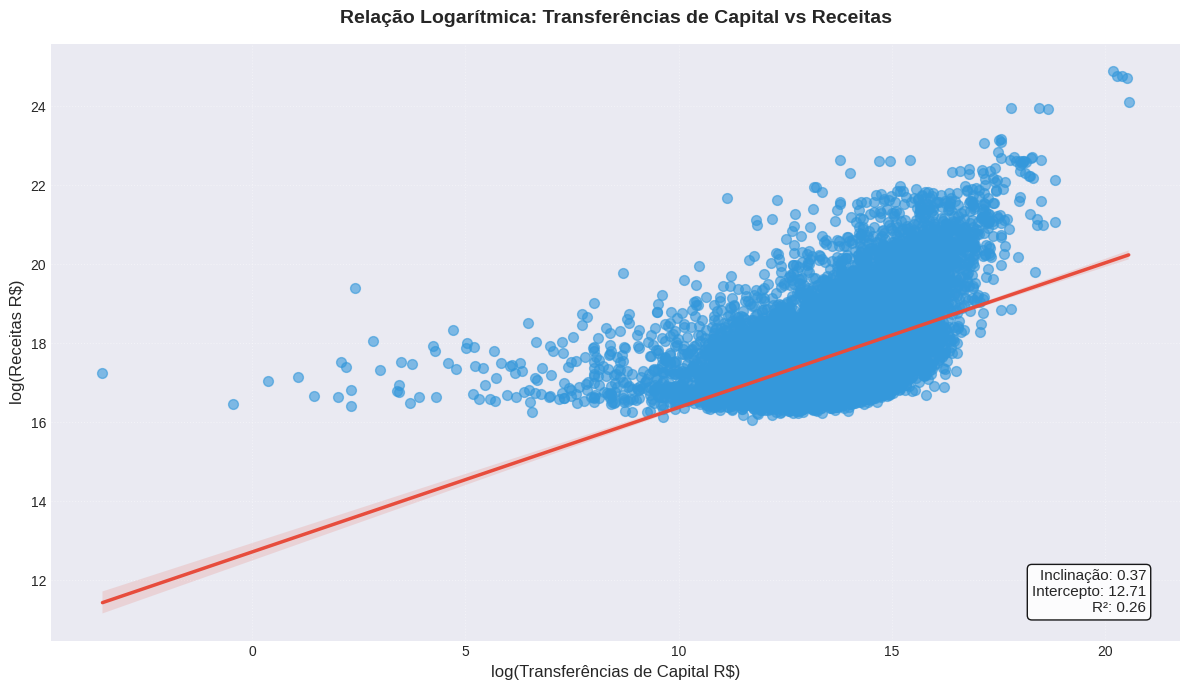

In [190]:
# Configura√ß√µes de estilo
COR_SCATTER = '#3498db'  # Azul consistente
COR_LINHA = '#e74c3c'    # Vermelho consistente
plt.style.use('seaborn-v0_8-darkgrid')

# Preparar dados (filtrar valores > 0 para log)
df_log = df[(df['Transferencias_capital_R$'] > 0) & (df['Receitas_R$'] > 0)].copy()
df_log['log_Transferencias_capital'] = np.log(df_log['Transferencias_capital_R$'])
df_log['log_Receitas'] = np.log(df_log['Receitas_R$'])

# Calcular estat√≠sticas da regress√£o
slope_log, intercept_log, r_value_log, p_value_log, std_err_log = stats.linregress(
    df_log['log_Transferencias_capital'],
    df_log['log_Receitas']
)
r2_log = r_value_log**2

# Criar figura
fig, ax = plt.subplots(figsize=(12, 7))

# --- Gr√°fico com transforma√ß√£o logar√≠tmica ---
sns.regplot(
    x='log_Transferencias_capital',
    y='log_Receitas',
    data=df_log,
    scatter_kws={'alpha': 0.6, 'color': COR_SCATTER, 's': 50},
    line_kws={'color': COR_LINHA, 'linewidth': 2.5},
    ci=95,
    ax=ax
)

ax.set_title('Rela√ß√£o Logar√≠tmica: Transfer√™ncias de Capital vs Receitas', fontsize=14, pad=15, fontweight='bold')
ax.set_xlabel('log(Transfer√™ncias de Capital R$)', fontsize=12)
ax.set_ylabel('log(Receitas R$)', fontsize=12)
ax.grid(True, linestyle=':', alpha=0.4)

# Caixa de texto com estat√≠sticas (no canto superior direito)
stats_text = (f"Inclina√ß√£o: {slope_log:.2f}\n"
              f"Intercepto: {intercept_log:.2f}\n"
              f"R¬≤: {r2_log:.2f}")
ax.text(0.97, 0.12, stats_text, transform=ax.transAxes,
        fontsize=11, verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

plt.tight_layout()
plt.show()

## An√°lise:
A an√°lise de regress√£o logar√≠tmica revela que as Transfer√™ncias de Capital t√™m um impacto positivo, por√©m moderado, nas Receitas (elasticidade de 0.37), indicando que um aumento de 1% nas transfer√™ncias resulta em um crescimento de apenas 0.37% nas receitas. O baixo R¬≤ (0.26) sugere que as transfer√™ncias explicam apenas 26% da varia√ß√£o nas receitas, destacando a influ√™ncia significativa de outros fatores n√£o considerados no modelo, como receitas pr√≥prias ou condi√ß√µes econ√¥micas locais. Portanto, embora as transfer√™ncias contribuam para as receitas, sua efic√°cia √© limitada, refor√ßando a necessidade de estrat√©gias complementares para fortalecer as finan√ßas.